In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CollegeRookieStatLog5.csv')
df.head()

Unnamed: 0            Name      School      G    MP   FG   FGA    FG%   2P  \
0           0   Kenyon Martin  Cincinnati  116.0  23.7  4.4   7.5  0.586  4.4   
1           1  Stromile Swift         LSU   50.0  26.6  5.1   9.0  0.560  4.9   
2           2    Marcus Fizer  Iowa State   97.0  32.9  7.1  13.9  0.511  6.9   
3           3      Chris Mihm       Texas   96.0  31.4  5.2  10.4  0.497  5.1   
4           4  Khalid El-Amin       UConn  108.0  30.3  5.4  12.9  0.416  3.6   

    2PA  ...  Year  Pos   #  Wins  Losses   Pts  Rbds  Offense  Defense   Diff  
0   7.5  ...  2000   PF  23    31      51 -1.04 -5.26   105.87   106.99  -1.12  
1   8.4  ...  2000   PF  26    22      60 -5.62  0.27   103.19   109.36  -6.18  
2  13.2  ...  2000   PF  28    17      65 -9.40 -0.74    95.25   105.81 -10.56  
3  10.1  ...  2000    C  28    17      65 -9.40 -0.74    95.25   105.81 -10.56  
4   7.8  ...  2000   PG  28    17      65 -9.40 -0.74    95.25   105.81 -10.56  

[5 rows x 41 columns]

In [2]:
df = df.drop(['Unnamed: 0'], axis=1)

In [3]:
df1 = df.replace('C-', 'C')
df1.head()

Name      School      G    MP   FG   FGA    FG%   2P   2PA  \
0   Kenyon Martin  Cincinnati  116.0  23.7  4.4   7.5  0.586  4.4   7.5   
1  Stromile Swift         LSU   50.0  26.6  5.1   9.0  0.560  4.9   8.4   
2    Marcus Fizer  Iowa State   97.0  32.9  7.1  13.9  0.511  6.9  13.2   
3      Chris Mihm       Texas   96.0  31.4  5.2  10.4  0.497  5.1  10.1   
4  Khalid El-Amin       UConn  108.0  30.3  5.4  12.9  0.416  3.6   7.8   

     2P%  ...  Year  Pos   #  Wins  Losses   Pts  Rbds  Offense  Defense  \
0  0.590  ...  2000   PF  23    31      51 -1.04 -5.26   105.87   106.99   
1  0.585  ...  2000   PF  26    22      60 -5.62  0.27   103.19   109.36   
2  0.524  ...  2000   PF  28    17      65 -9.40 -0.74    95.25   105.81   
3  0.503  ...  2000    C  28    17      65 -9.40 -0.74    95.25   105.81   
4  0.456  ...  2000   PG  28    17      65 -9.40 -0.74    95.25   105.81   

    Diff  
0  -1.12  
1  -6.18  
2 -10.56  
3 -10.56  
4 -10.56  

[5 rows x 40 columns]

In [4]:
df1['Fouls'] = df1['PF']
df1 = df1.drop(['PF'], axis=1)
dum1 = pd.get_dummies(df1['Pos'])
df1 = pd.concat([df1, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1.head()

Name      School      G    MP   FG   FGA    FG%   2P   2PA  \
0   Kenyon Martin  Cincinnati  116.0  23.7  4.4   7.5  0.586  4.4   7.5   
1  Stromile Swift         LSU   50.0  26.6  5.1   9.0  0.560  4.9   8.4   
2    Marcus Fizer  Iowa State   97.0  32.9  7.1  13.9  0.511  6.9  13.2   
3      Chris Mihm       Texas   96.0  31.4  5.2  10.4  0.497  5.1  10.1   
4  Khalid El-Amin       UConn  108.0  30.3  5.4  12.9  0.416  3.6   7.8   

     2P%  ...  Rbds  Offense  Defense   Diff  Fouls  C  PF  PG  SF  SG  
0  0.590  ... -5.26   105.87   106.99  -1.12    2.0  0   1   0   0   0  
1  0.585  ...  0.27   103.19   109.36  -6.18    2.6  0   1   0   0   0  
2  0.524  ... -0.74    95.25   105.81 -10.56    1.9  0   1   0   0   0  
3  0.503  ... -0.74    95.25   105.81 -10.56    1.9  1   0   0   0   0  
4  0.456  ... -0.74    95.25   105.81 -10.56    1.4  0   0   1   0   0  

[5 rows x 44 columns]

In [5]:
schoolnames = df1.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df1 = df1.replace({'School': sc_dict})
df1.head()

Name  School      G    MP   FG   FGA    FG%   2P   2PA    2P%  \
0   Kenyon Martin       0  116.0  23.7  4.4   7.5  0.586  4.4   7.5  0.590   
1  Stromile Swift       1   50.0  26.6  5.1   9.0  0.560  4.9   8.4  0.585   
2    Marcus Fizer       2   97.0  32.9  7.1  13.9  0.511  6.9  13.2  0.524   
3      Chris Mihm       3   96.0  31.4  5.2  10.4  0.497  5.1  10.1  0.503   
4  Khalid El-Amin       4  108.0  30.3  5.4  12.9  0.416  3.6   7.8  0.456   

   ...  Rbds  Offense  Defense   Diff  Fouls  C  PF  PG  SF  SG  
0  ... -5.26   105.87   106.99  -1.12    2.0  0   1   0   0   0  
1  ...  0.27   103.19   109.36  -6.18    2.6  0   1   0   0   0  
2  ... -0.74    95.25   105.81 -10.56    1.9  0   1   0   0   0  
3  ... -0.74    95.25   105.81 -10.56    1.9  1   0   0   0   0  
4  ... -0.74    95.25   105.81 -10.56    1.4  0   0   1   0   0  

[5 rows x 44 columns]

In [6]:
df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

G    MP   FG   FGA    FG%   2P   2PA    2P%   3P  3PA  \
Name                                                                        
Kenyon Martin   116.0  23.7  4.4   7.5  0.586  4.4   7.5  0.590  0.0  0.1   
Stromile Swift   50.0  26.6  5.1   9.0  0.560  4.9   8.4  0.585  0.2  0.7   
Marcus Fizer     97.0  32.9  7.1  13.9  0.511  6.9  13.2  0.524  0.2  0.7   
Chris Mihm       96.0  31.4  5.2  10.4  0.497  5.1  10.1  0.503  0.1  0.3   
Khalid El-Amin  108.0  30.3  5.4  12.9  0.416  3.6   7.8  0.456  1.8  5.1   

                ...  Rbds  Offense  Defense   Diff  Fouls  C  PF  PG  SF  SG  
Name            ...                                                           
Kenyon Martin   ... -5.26   105.87   106.99  -1.12    2.0  0   1   0   0   0  
Stromile Swift  ...  0.27   103.19   109.36  -6.18    2.6  0   1   0   0   0  
Marcus Fizer    ... -0.74    95.25   105.81 -10.56    1.9  0   1   0   0   0  
Chris Mihm      ... -0.74    95.25   105.81 -10.56    1.9  1   0   0   0   0  
Khalid El-Amin  ... -0.74    95.25   105.81 -10.56    1.4  0   0   1   0   0  

[5 rows x 42 columns]

In [7]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

G    MP   FG   FGA    FG%   2P   2PA    2P%   3P  3PA  \
Name                                                                        
Kenyon Martin   116.0  23.7  4.4   7.5  0.586  4.4   7.5  0.590  0.0  0.1   
Stromile Swift   50.0  26.6  5.1   9.0  0.560  4.9   8.4  0.585  0.2  0.7   
Marcus Fizer     97.0  32.9  7.1  13.9  0.511  6.9  13.2  0.524  0.2  0.7   
Chris Mihm       96.0  31.4  5.2  10.4  0.497  5.1  10.1  0.503  0.1  0.3   
Khalid El-Amin  108.0  30.3  5.4  12.9  0.416  3.6   7.8  0.456  1.8  5.1   

                ...  C  PF  PG  SF  SG  NBATRB  NBAAST  NBASTL  NBABLK  NBAPTS  
Name            ...                                                             
Kenyon Martin   ...  0   1   0   0   0     7.4     1.9     1.1     1.7    12.0  
Stromile Swift  ...  0   1   0   0   0     3.6     0.4     0.8     1.0     4.9  
Marcus Fizer    ...  0   1   0   0   0     4.3     1.1     0.4     0.3     9.5  
Chris Mihm      ...  1   0   0   0   0     4.7     0.3     0.3     0.9     7.6  
Khalid El-Amin  ...  0   0   1   0   0     1.6     2.9     1.0     0.0     6.3  

[5 rows x 42 columns]

In [8]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['NBATRB','NBAAST','NBASTL','NBABLK']
for du in dum:
    cols.remove(du)

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
#df1['NBAPTS'] = sc2.fit_transform(df1['NBAPTS'])
sc3 = StandardScaler()
df1[['NBABLK']] = sc3.fit_transform(df1[['NBABLK']])
sc4 = StandardScaler()
df1[['NBASTL']] = sc4.fit_transform(df1[['NBASTL']])
sc5 = StandardScaler()
df1[['NBAAST']] = sc5.fit_transform(df1[['NBAAST']])
sc6 = StandardScaler()
df1[['NBATRB']] = sc6.fit_transform(df1[['NBATRB']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

G        MP        FG       FGA       FG%        2P  \
Name                                                                         
Kenyon Martin   0.797162 -1.099515 -0.278510 -0.913785  1.909497  0.532800   
Stromile Swift -0.973751 -0.470289  0.263631 -0.375484  1.450974  0.917797   
Marcus Fizer    0.287354  0.896649  1.812606  1.382964  0.586836  2.457786   
Chris Mihm      0.260522  0.571188  0.341080  0.126929  0.339939  1.071796   
Khalid El-Amin  0.582506  0.332516  0.495977  1.024097 -1.088535 -0.083195   

                     2PA       2P%        3P       3PA  ...         C  \
Name                                                    ...             
Kenyon Martin   0.149737  1.352696 -1.372758 -1.418764  ... -0.336668   
Stromile Swift  0.534145  1.259332 -1.111831 -1.115597  ... -0.336668   
Marcus Fizer    2.584320  0.120285 -1.111831 -1.115597  ... -0.336668   
Chris Mihm      1.260249 -0.271845 -1.242295 -1.317709  ...  2.970283   
Khalid El-Amin  0.277873 -1.149472  0.975584  1.107632  ... -0.336668   

                      PF        PG        SF        SG    NBATRB    NBAAST  \
Name                                                                         
Kenyon Martin   1.967740 -0.559017 -0.477308 -0.607074  2.638092  0.490424   
Stromile Swift  1.967740 -0.559017 -0.477308 -0.607074  0.633010 -0.592231   
Marcus Fizer    1.967740 -0.559017 -0.477308 -0.607074  1.002368 -0.086992   
Chris Mihm     -0.508197 -0.559017 -0.477308 -0.607074  1.213429 -0.664408   
Khalid El-Amin -0.508197  1.788854 -0.477308 -0.607074 -0.422296  1.212195   

                  NBASTL    NBABLK    NBAPTS  
Name                                          
Kenyon Martin   1.580453  4.462180  1.549026  
Stromile Swift  0.809016  2.281977 -0.124888  
Marcus Fizer   -0.219566  0.101773  0.959619  
Chris Mihm     -0.476712  1.970519  0.511671  
Khalid El-Amin  1.323307 -0.832599  0.205179  

[5 rows x 42 columns]

In [194]:
df3 = df1[0:559]
df4 = df1[559:]

In [195]:
df4.head()

G        MP        FG       FGA       FG%  \
Name                                                                         
Zion Williamson          -1.429895  0.267424  3.284132  1.131757  3.567232   
Jaxson Hayes             -1.456728 -1.186305 -0.743203 -1.703292  4.413735   
Nickeil Alexander-Walker -0.517607  0.245726 -0.046164  0.019269 -0.242032   
RJ Barrett               -1.295735  1.417388  2.819440  3.033751 -0.418387   
Ignas Brazdeikis         -1.322567  0.180634  0.263631  0.342249 -0.277303   

                                2P       2PA       2P%        3P       3PA  \
Name                                                                         
Zion Williamson           3.458778  1.644657  4.284341 -0.459514 -0.357678   
Jaxson Hayes              0.070804 -0.789926  3.929556 -1.372758 -1.469292   
Nickeil Alexander-Walker -0.545191 -0.661790  0.213650  0.845120  0.804464   
RJ Barrett                2.149788  2.157201  0.213650  1.106047  1.663439   
Ignas Brazdeikis         -0.083195 -0.021111 -0.327864  0.584193  0.501297   

                          ...         C        PF        PG        SF  \
Name                      ...                                           
Zion Williamson           ... -0.336668  1.967740 -0.559017 -0.477308   
Jaxson Hayes              ... -0.336668  1.967740 -0.559017 -0.477308   
Nickeil Alexander-Walker  ... -0.336668 -0.508197 -0.559017 -0.477308   
RJ Barrett                ... -0.336668 -0.508197 -0.559017 -0.477308   
Ignas Brazdeikis          ... -0.336668 -0.508197 -0.559017  2.095085   

                                SG    NBATRB    NBAAST    NBASTL    NBABLK  \
Name                                                                         
Zion Williamson          -0.607074 -1.266541 -0.880939 -1.248148 -0.832599   
Jaxson Hayes             -0.607074 -1.266541 -0.880939 -1.248148 -0.832599   
Nickeil Alexander-Walker  1.647245 -1.266541 -0.880939 -1.248148 -0.832599   
RJ Barrett                1.647245 -1.266541 -0.880939 -1.248148 -0.832599   
Ignas Brazdeikis         -0.607074 -1.266541 -0.880939 -1.248148 -0.832599   

                            NBAPTS  
Name                                
Zion Williamson          -1.280125  
Jaxson Hayes             -1.280125  
Nickeil Alexander-Walker -1.280125  
RJ Barrett               -1.280125  
Ignas Brazdeikis         -1.280125  

[5 rows x 42 columns]

In [196]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [37], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [37], axis=1)
test_x=tests[0]
test_y=tests[1]

In [197]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [198]:
test_y.tail()

NBATRB    NBAAST    NBASTL    NBABLK    NBAPTS
Name                                                            
Jacob Evans    -0.844418 -0.303523 -0.733857 -0.521142 -0.973634
Gary Trent      0.527480 -0.375700 -0.219566 -0.209684  0.488094
Hamidou Diallo -0.264000 -0.664408 -0.219566 -0.209684 -0.407803
Chimezie Metu  -0.633357 -0.592231 -0.733857 -0.521142 -0.855752
Thomas Welsh   -1.055480 -0.520054 -1.248148 -0.832599 -0.902905

## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


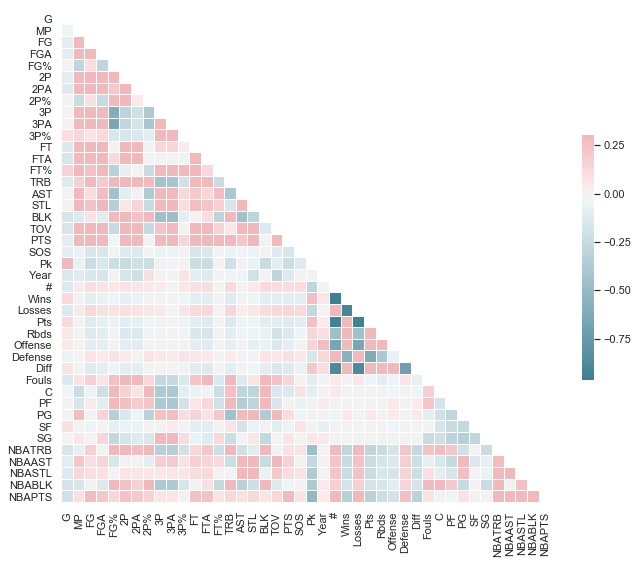

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Feature Selection

In [199]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 30)
reg = rfe.fit(train_x.values, train_y.NBAPTS.values)
print(reg.support_)
print(reg.ranking_)

[False  True  True  True  True  True  True  True  True  True  True  True
 False False  True  True  True False  True  True False  True  True  True
  True  True  True  True  True  True  True False  True  True  True False
  True]
[4 1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 8 1 1 6 1 1 1 1 1 1 1 1 1 1 5 1 1 1 7 1]


In [515]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=4, n_estimators=1000,bootstrap=True).fit(train_x.values, train_y.NBAPTS.values)
reg.feature_importances_

array([0.02222764, 0.01728174, 0.02502246, 0.02118001, 0.0175208 ,
       0.01841157, 0.01668924, 0.02051671, 0.01279254, 0.01246122,
       0.01329423, 0.01710903, 0.01587694, 0.01469454, 0.01612215,
       0.01688678, 0.02084707, 0.01348514, 0.01404931, 0.02575744,
       0.01907401, 0.33080689, 0.0214407 , 0.03054885, 0.03254369,
       0.02973122, 0.02471296, 0.0206899 , 0.01737892, 0.02131366,
       0.02330061, 0.01550162, 0.00559009, 0.01944581, 0.0134281 ,
       0.00974907, 0.01251733])

In [200]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
picks = []
for x in range(0,37):
    if reg.support_[x]:
        picks.append(cols[x])
train_x=train_x[picks]
test_x=test_x[picks]
train_x.head()

MP        FG       FGA       FG%        2P       2PA  \
Name                                                                         
Kenyon Martin  -1.099515 -0.278510 -0.913785  1.909497  0.532800  0.149737   
Stromile Swift -0.470289  0.263631 -0.375484  1.450974  0.917797  0.534145   
Marcus Fizer    0.896649  1.812606  1.382964  0.586836  2.457786  2.584320   
Chris Mihm      0.571188  0.341080  0.126929  0.339939  1.071796  1.260249   
Khalid El-Amin  0.332516  0.495977  1.024097 -1.088535 -0.083195  0.277873   

                     2P%        3P       3PA       3P%  ...    Losses  \
Name                                                    ...             
Kenyon Martin   1.352696 -1.372758 -1.418764 -1.076423  ...  0.587821   
Stromile Swift  1.259332 -1.111831 -1.115597 -0.889632  ...  1.353469   
Marcus Fizer    0.120285 -1.111831 -1.115597 -0.422656  ...  1.778829   
Chris Mihm     -0.271845 -1.242295 -1.317709 -0.347940  ...  1.778829   
Khalid El-Amin -1.149472  0.975584  1.107632  0.165734  ...  1.778829   

                     Pts      Rbds   Offense   Defense      Diff         C  \
Name                                                                         
Kenyon Martin   0.026335 -1.903918 -0.094554 -0.042141 -0.040452 -0.336668   
Stromile Swift -1.018824  0.150670 -0.761842  0.587438 -0.966420 -0.336668   
Marcus Fizer   -1.881423 -0.224580 -2.738805 -0.355602 -1.767950 -0.336668   
Chris Mihm     -1.881423 -0.224580 -2.738805 -0.355602 -1.767950  2.970283   
Khalid El-Amin -1.881423 -0.224580 -2.738805 -0.355602 -1.767950 -0.336668   

                      PF        PG        SG  
Name                                          
Kenyon Martin   1.967740 -0.559017 -0.607074  
Stromile Swift  1.967740 -0.559017 -0.607074  
Marcus Fizer    1.967740 -0.559017 -0.607074  
Chris Mihm     -0.508197 -0.559017 -0.607074  
Khalid El-Amin -0.508197  1.788854 -0.607074  

[5 rows x 30 columns]

## Linear Regression

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

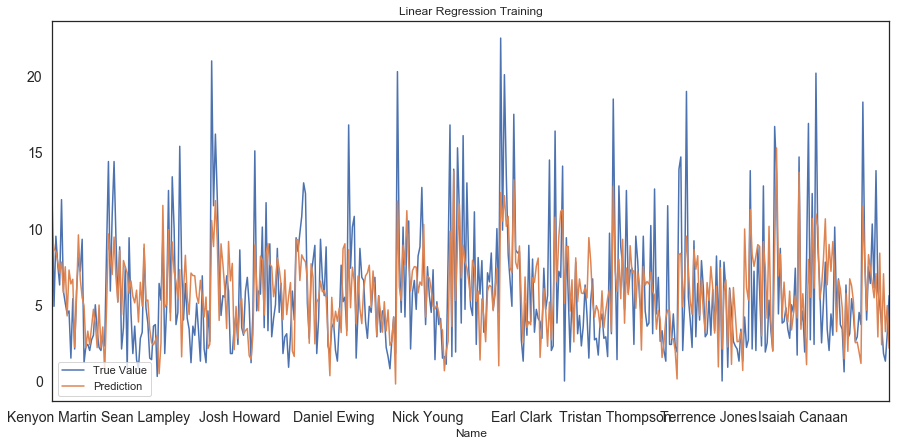

adj train r^2 = 0.3651313268633447
train mse = 9.823986124812413


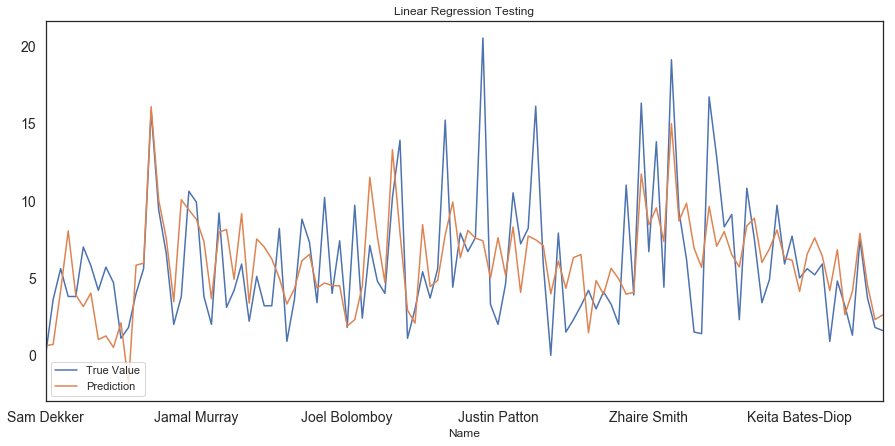

adj test r^2 = 0.30333060471508877
test mse = 11.21652709231796


In [202]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

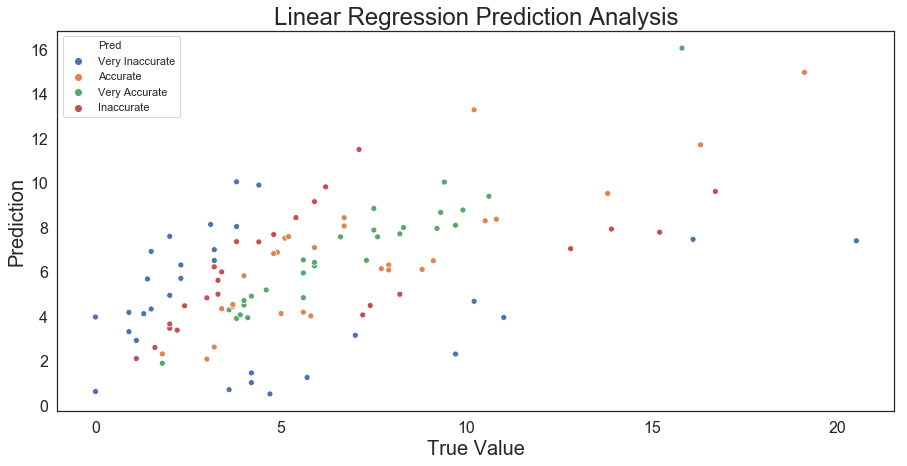

This model is able to relatively accurately predict 25.23% of NBA Rookies.
This model is able to very accurately predict 25.23% of NBA Rookies.


In [203]:
import seaborn as sns
test_y2 = test_y2[test_y2['prediction'] > 0]
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Linear Regression Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

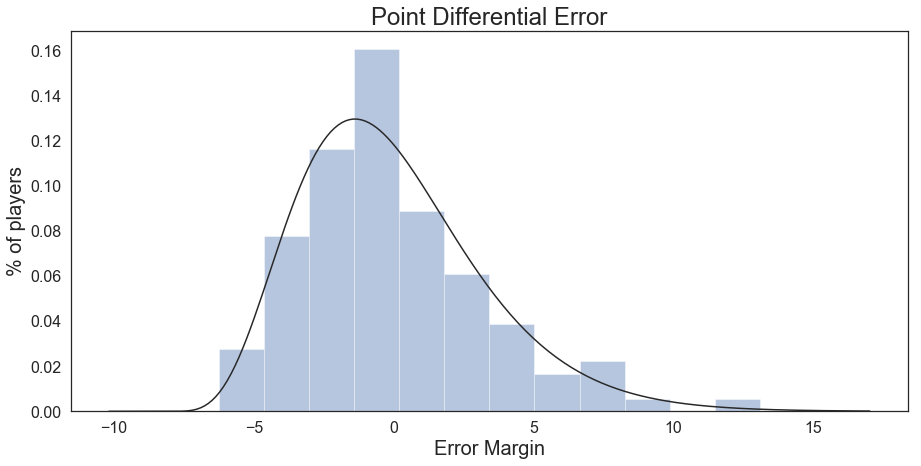

This model is able to relatively accurately predict 48.21% of NBA Rookies within 2 points.


In [30]:
from scipy import stats
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [31]:
cross_x = train_x.append(test_x, ignore_index = True)
cross_y = train_y.append(test_y, ignore_index = True)
cross_x = cross_x.set_index(df3.index)
cross_y = cross_y.set_index(df3.index)
cvs = cross_val_score(reg, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

The Cross Validation Score is 30.04


In [32]:
webdata = pd.DataFrame(test_y2['NBAPTS'].values, columns=['Real'])
webdata['pred1'] = test_y2['prediction'].values
webdata['hue1'] = test_y2['Pred'].values
webdata['chip1'] = test_y2['chip'].values

## Extra Trees

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=22, n_estimators=1000,max_depth=4, bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=4,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=22,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

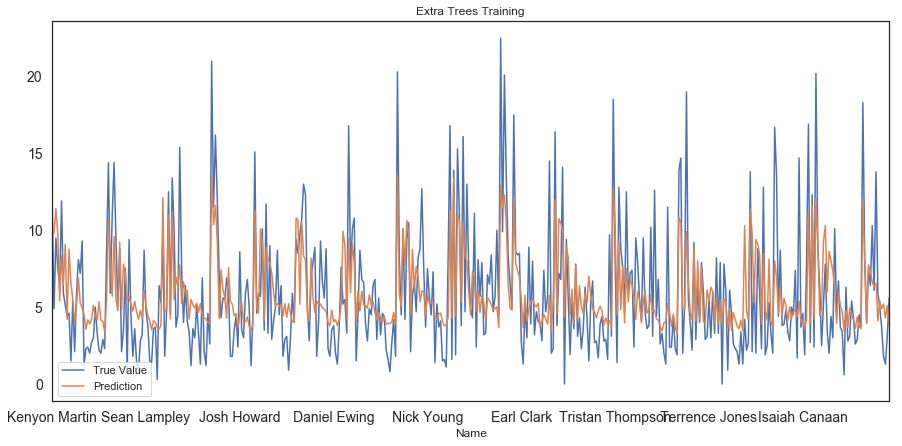

adj train r^2 = 0.4708928156773873
train mse = 8.187428136346325


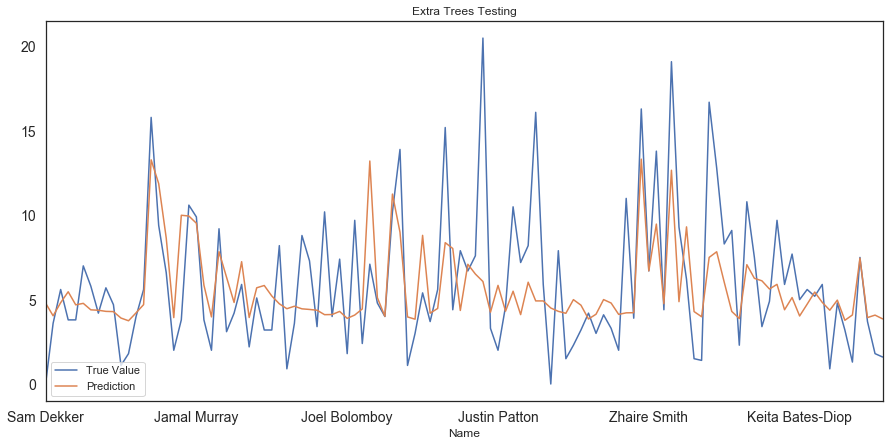

adj test r^2 = 0.2951894395664555
test mse = 11.347601602079274


In [34]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

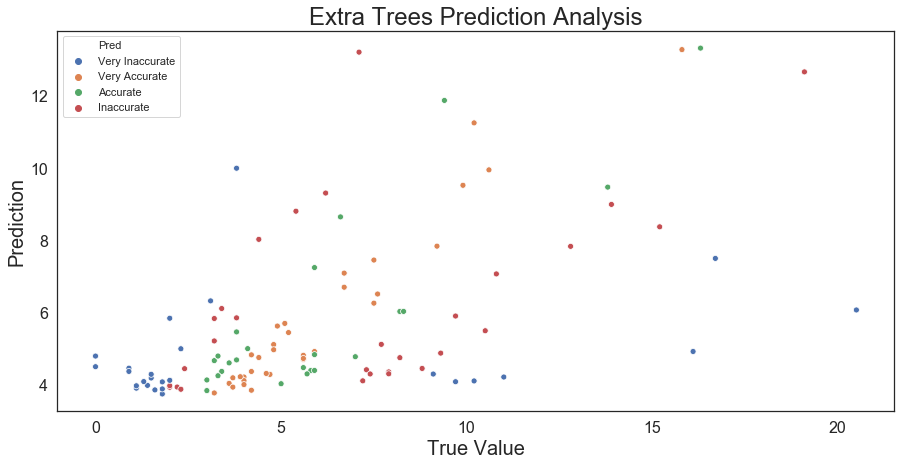

This model is able to relatively accurately predict 21.43% of NBA Rookies.
This model is able to very accurately predict 29.46% of NBA Rookies.


In [35]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Extra Trees Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

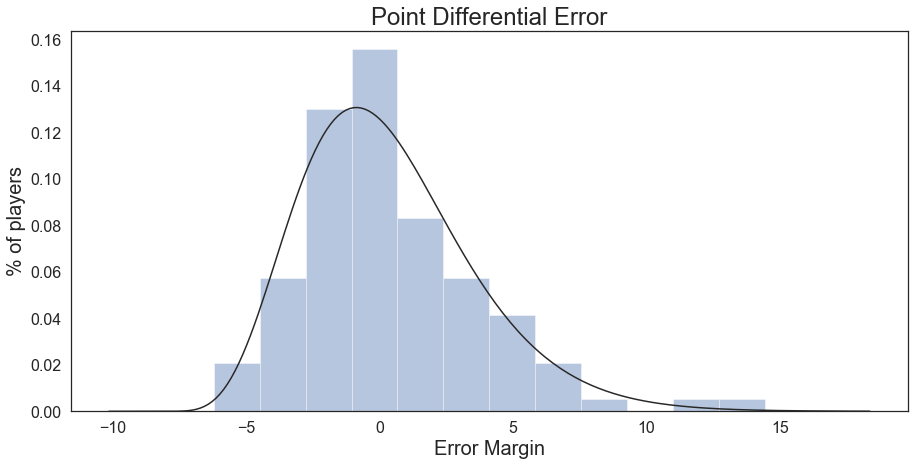

This model is able to relatively accurately predict 48.21% of NBA Rookies within 2 points.


In [36]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [37]:
cvs = cross_val_score(reg, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

The Cross Validation Score is 38.07


In [38]:
webdata['pred2'] = test_y2['prediction'].values
webdata['hue2'] = test_y2['Pred'].values
webdata['chip2'] = test_y2['chip'].values

## Cross Validated Extra Trees

In [39]:
from sklearn.model_selection import cross_val_score
cross_x = train_x.append(test_x, ignore_index = True)
cross_y = train_y.append(test_y, ignore_index = True)
cross_x = cross_x.set_index(df3.index)
cross_y = cross_y.set_index(df3.index)
cross_val_score(reg, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')

array([0.39171576, 0.45077624, 0.42801085, 0.28892411, 0.34055647])

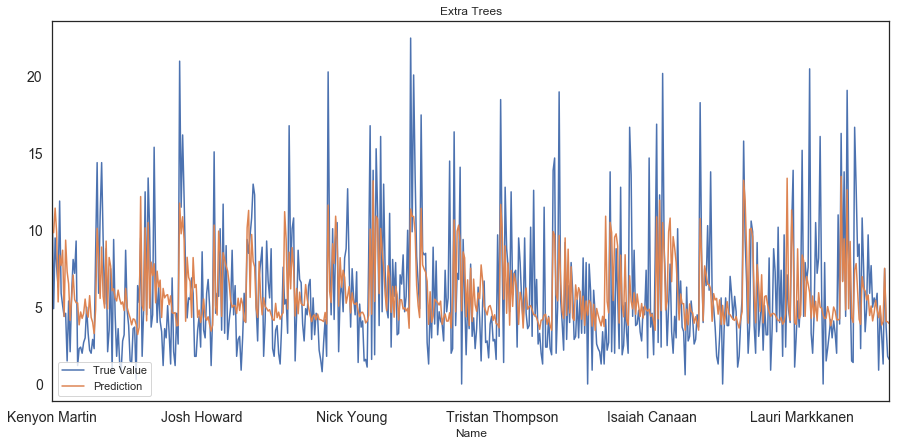

adj overall r^2 = 0.33702220266164706
overall mse = 10.343750906536473


In [40]:
from sklearn.model_selection import cross_val_predict
train_y2 = cross_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(cross_val_predict(reg, cross_x, cross_y.NBAPTS, cv=5))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj overall r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('overall mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

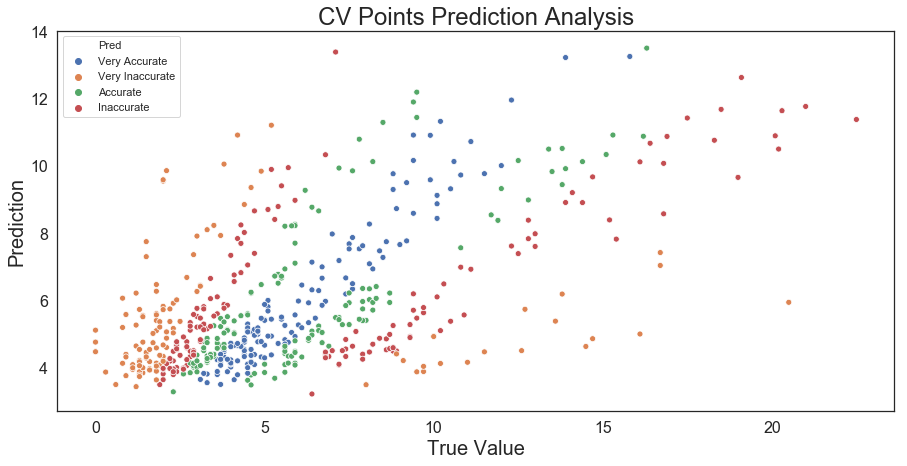

This model is able to relatively accurately predict 26.12% of NBA Rookies.
This model is able to very accurately predict 25.22% of NBA Rookies.
adj overall r^2 = 0.33702220266164706
overall mse = 10.343750906536473


In [41]:
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=train_y2)
ax.set_title("CV Points Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Very Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")
print('adj overall r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('overall mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

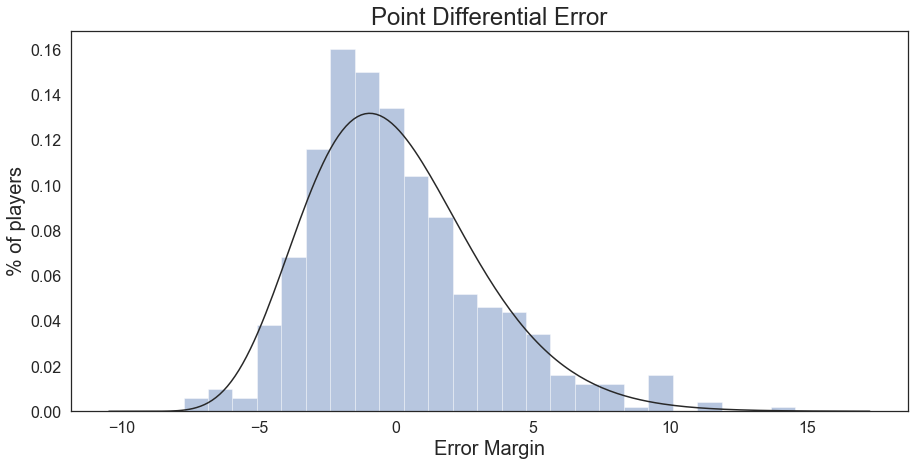

This model is able to relatively accurately predict 49.91% of NBA Rookies within 2 points.


In [42]:
train_y2['chip'] = (train_y2['NBAPTS'] - train_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = train_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(train_y2[abs(train_y2['chip'])<=2])/len(train_y2),2)) + "% of NBA Rookies within 2 points.")

## Grid Search on Extra Trees

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth': np.arange(2,28,2),
              'min_samples_split': np.arange(2,11),
              'bootstrap': [True, False],
              'n_estimators': [200,800]}

grid = RandomizedSearchCV(ExtraTreesRegressor(), param_grid, n_iter=10, cv=5)

In [44]:
grid.fit(cross_x, cross_y);

In [45]:
grid.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'max_depth': 18,
 'bootstrap': True}

In [46]:
reg = ExtraTreesRegressor(min_samples_split=5, n_estimators=200, max_depth=18, bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)
cvs = cross_val_score(reg, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

The Cross Validation Score is 36.99


adj train r^2 = 0.858807788907856
train mse = 2.18481456306199


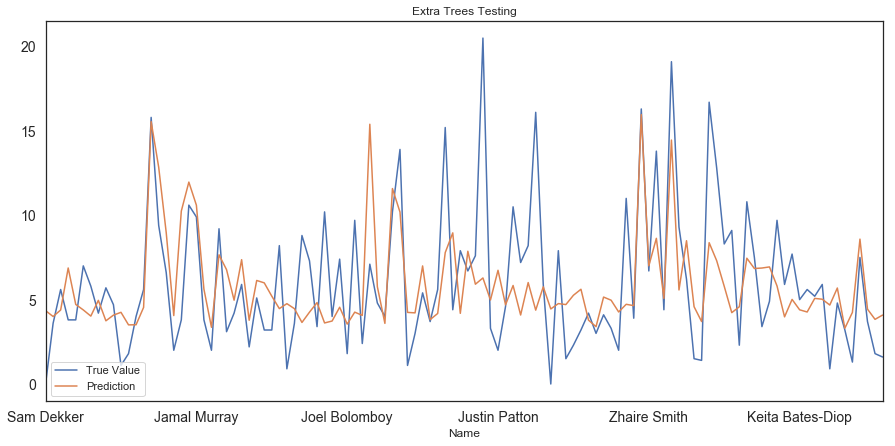

adj test r^2 = 0.26295318478600294
test mse = 11.86661223688969


In [47]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

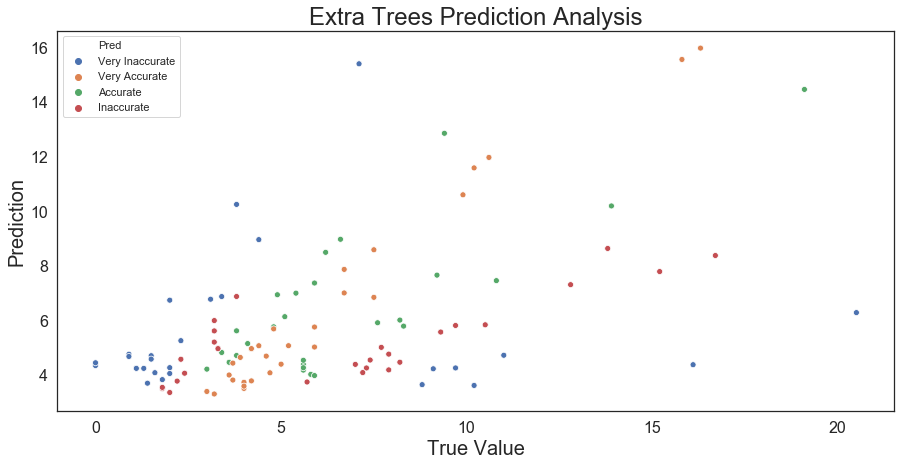

This model is able to relatively accurately predict 24.11% of NBA Rookies.
This model is able to very accurately predict 25.89% of NBA Rookies.


In [48]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Extra Trees Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

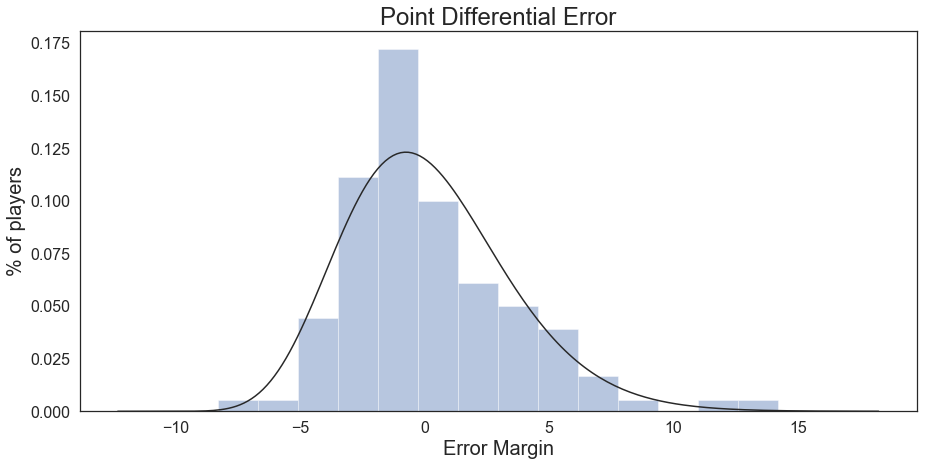

This model is able to relatively accurately predict 49.11% of NBA Rookies within 2 points.


In [49]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

## Random Forrest

In [50]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000, max_depth=5, min_samples_split=14)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

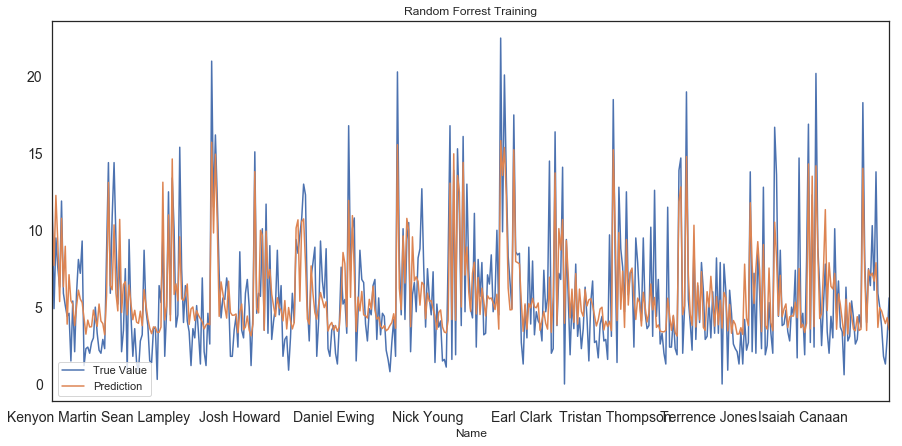

adj train r^2 = 0.6538484753586828
train mse = 5.356364109695149


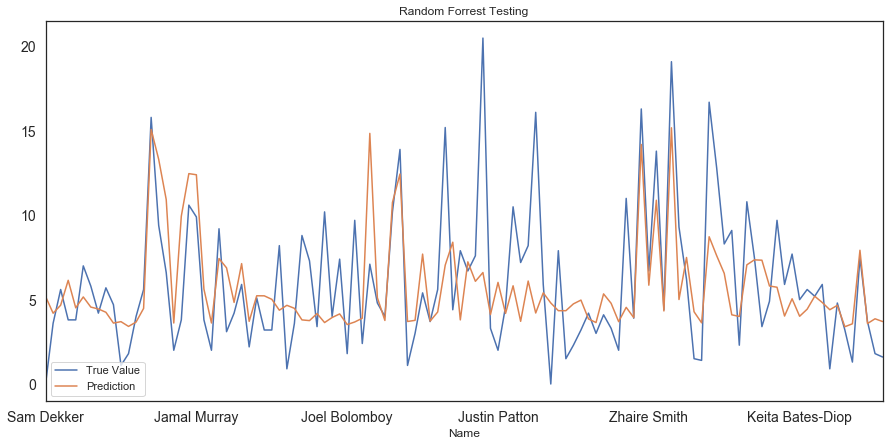

adj test r^2 = 0.29228063901216617
test mse = 11.394433916580464


In [51]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

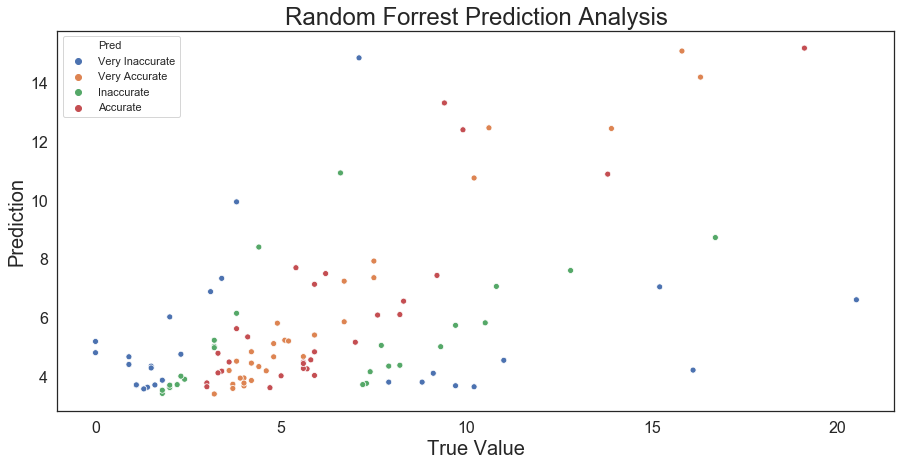

This model is able to relatively accurately predict 25.89% of NBA Rookies.
This model is able to very accurately predict 26.79% of NBA Rookies.


In [52]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Random Forrest Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

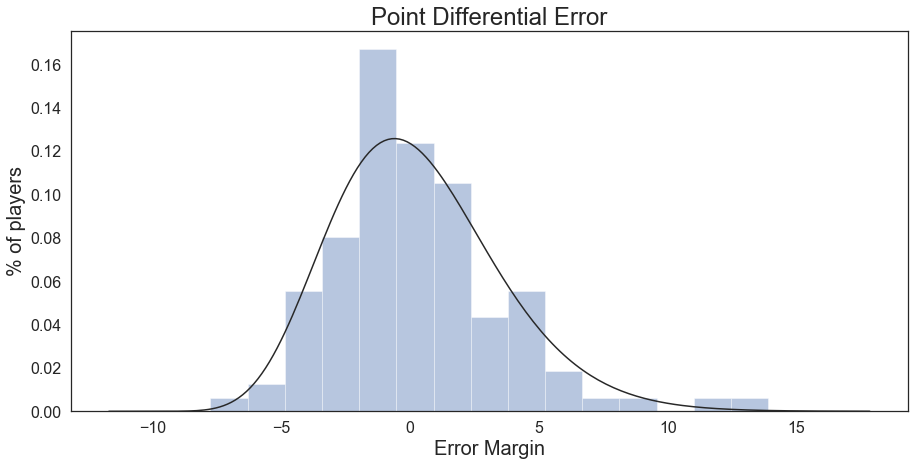

This model is able to relatively accurately predict 55.36% of NBA Rookies within 2 points.


In [53]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [54]:
cvs = cross_val_score(reg, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

The Cross Validation Score is 36.86


In [55]:
webdata['pred3'] = test_y2['prediction'].values
webdata['hue3'] = test_y2['Pred'].values
webdata['chip3'] = test_y2['chip'].values

## XGBoost

In [56]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [57]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000, max_depth=16, reg_lambda=.48, gamma=.3, booster='gblinear')
reg.fit(train_x.values, train_y.NBAPTS.values)

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.3, learning_rate=0.1, max_delta_step=0,
       max_depth=16, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.48, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

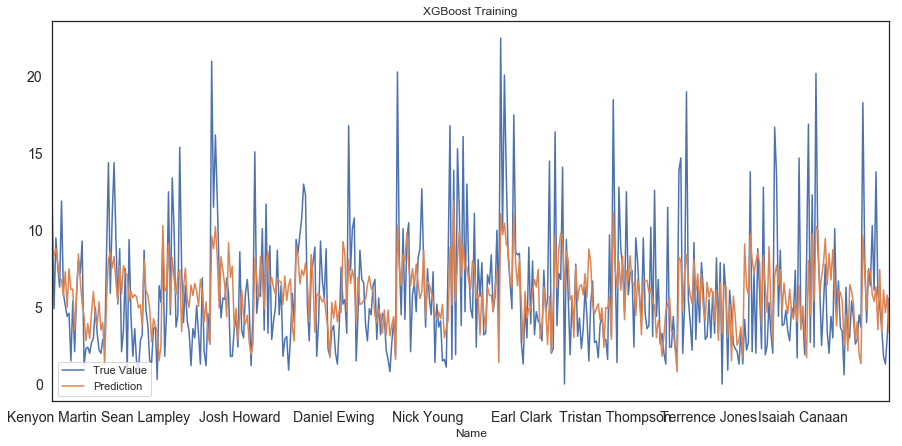

adj train r^2 = 0.30611997320655704
train mse = 10.737130439630247


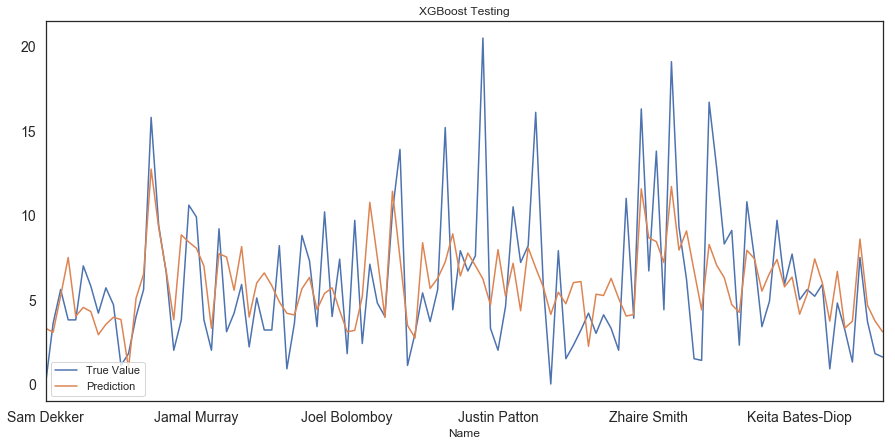

adj test r^2 = 0.2907870657663919
test mse = 11.418480767050672


In [58]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

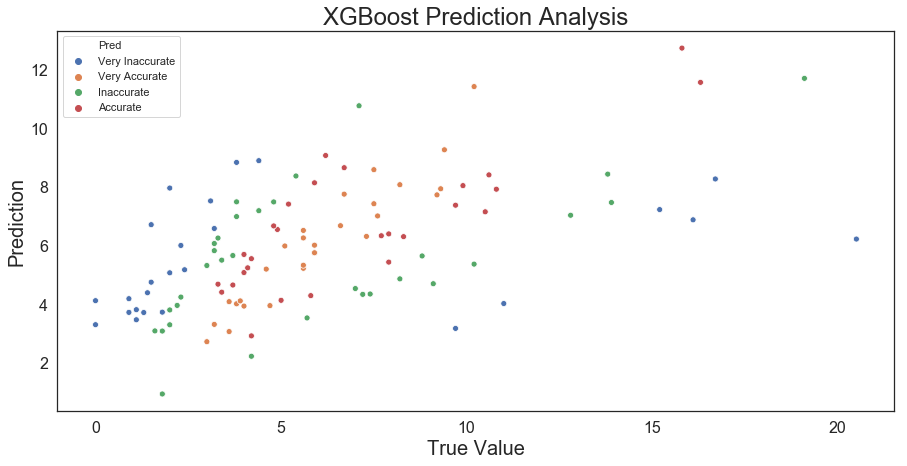

This model is able to relatively accurately predict 24.11% of NBA Rookies.
This model is able to very accurately predict 25.0% of NBA Rookies.


In [59]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("XGBoost Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

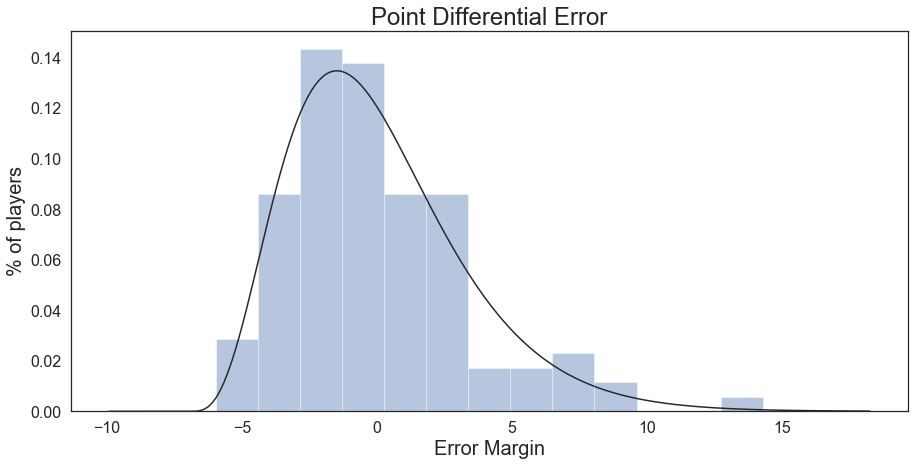

This model is able to relatively accurately predict 49.11% of NBA Rookies within 2 points.


In [60]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [61]:
cvs = cross_val_score(reg, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

The Cross Validation Score is 30.89


In [62]:
webdata['pred4'] = test_y2['prediction'].values
webdata['hue4'] = test_y2['Pred'].values
webdata['chip4'] = test_y2['chip'].values

## Feed Forward Neural Network

In [63]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [71]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=30, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
out = model.fit(train_x.values, train_y.NBAPTS.values, validation_data=[test_x.values, test_y['NBAPTS'].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])

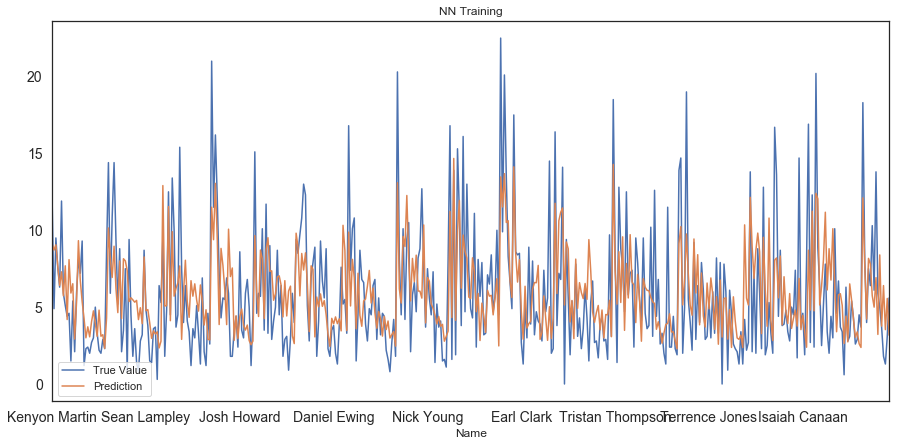

adj train r^2 = 0.40470336664704176
train mse = 9.211646618682952


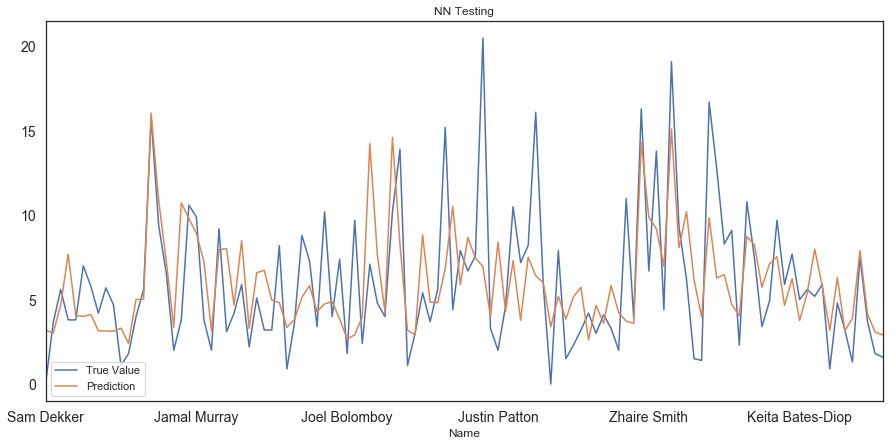

adj test r^2 = 0.2990874255428053
test mse = 11.28484318954513


In [72]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

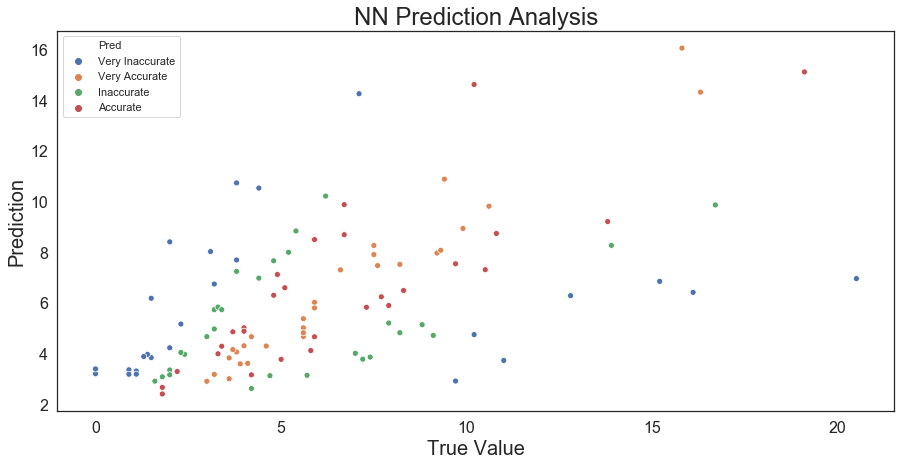

This model is able to relatively accurately predict 25.0% of NBA Rookies.
This model is able to very accurately predict 25.89% of NBA Rookies.


In [73]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("NN Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

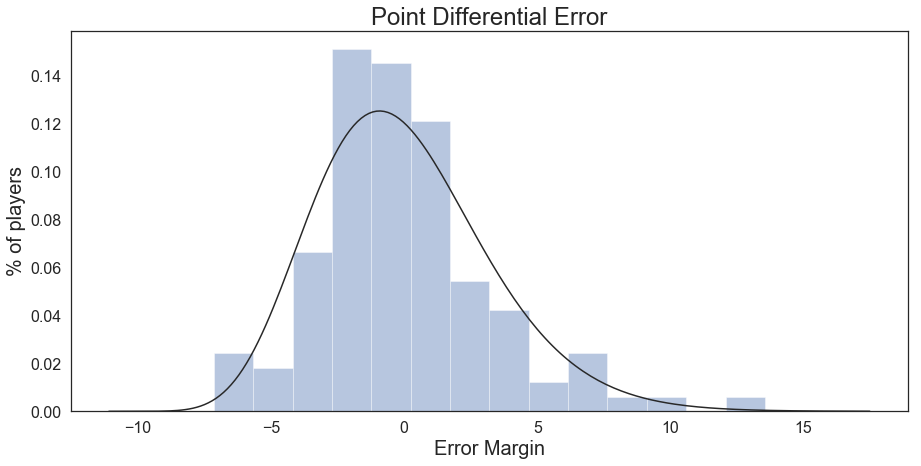

This model is able to relatively accurately predict 50.89% of NBA Rookies within 2 points.


In [74]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [78]:
from keras import backend as K

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [80]:
from sklearn.model_selection import KFold
X = cross_x.values
Y = cross_y.NBAPTS.values
seed = 10
np.random.seed(seed)
kfold = KFold(n_splits=5, shuffle=False, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
    K.clear_session()
    model = Sequential()
    model.add(Dense(128, input_dim=30, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
    #model.add(Dropout(0.2))
    model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
    model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=[r2_keras])
    early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=False)
    out = model.fit(X[train], Y[train], validation_data=[X[test], Y[test]], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])
    scores = model.evaluate(X[test], Y[test], verbose=0)
    cvscores.append(scores[1])
print('The Cross Validation Score is ' + str(round(100*np.mean(cvscores),2)))

The Cross Validation Score is 31.63


In [81]:
webdata['pred5'] = test_y2['prediction'].values
webdata['hue5'] = test_y2['Pred'].values
webdata['chip5'] = test_y2['chip'].values

## LSTM

In [82]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [86]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(1, train_x.values.shape[1]), recurrent_activation='linear', recurrent_regularizer=regularizers.l2(0.32),kernel_initializer='lecun_uniform',return_sequences=True))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(50, activation='linear'))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.NBAPTS.values.ravel(), validation_data=[X_tst_t, test_y['NBAPTS'].values.ravel()], epochs=50, verbose=0, shuffle=False, callbacks=[early_stop])

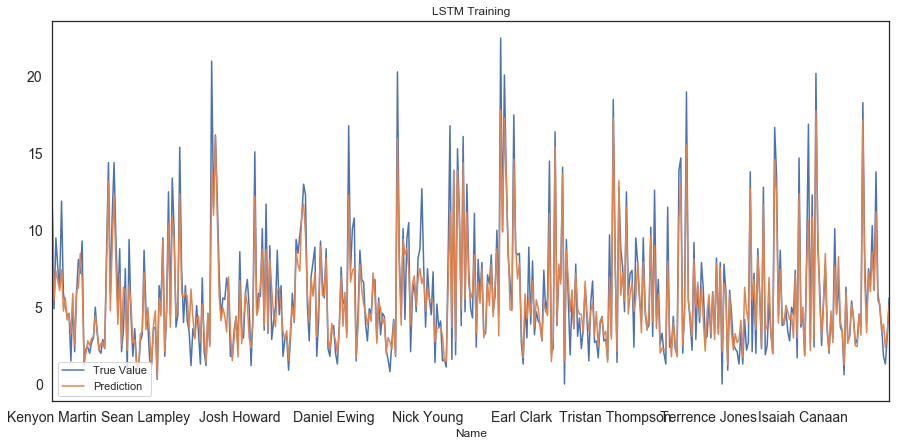

adj train r^2 = 0.8622720953603338
train mse = 2.1312077307180783


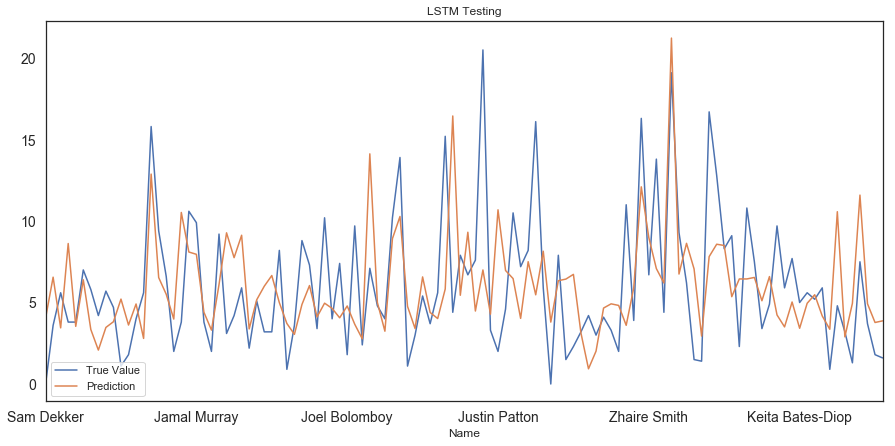

adj test r^2 = 0.06633474706446685
test mse = 15.032211369676235


In [87]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

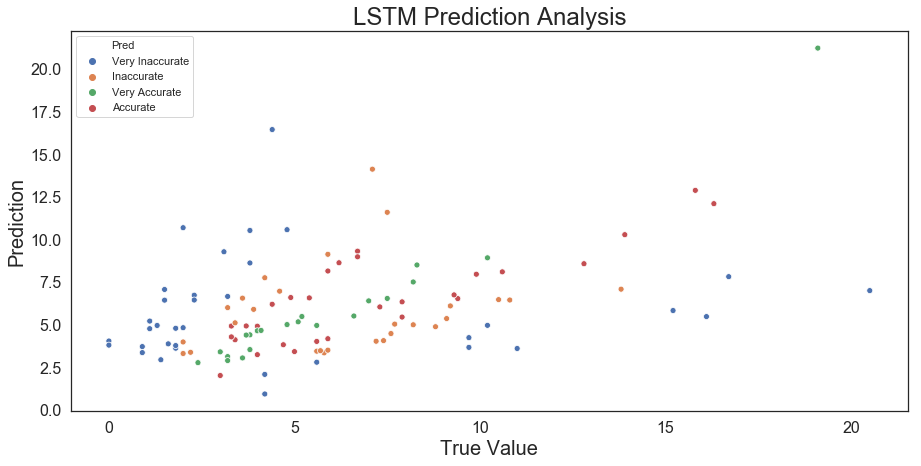

This model is able to relatively accurately predict 25.89% of NBA Rookies.
This model is able to very accurately predict 18.75% of NBA Rookies.


In [88]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("LSTM Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

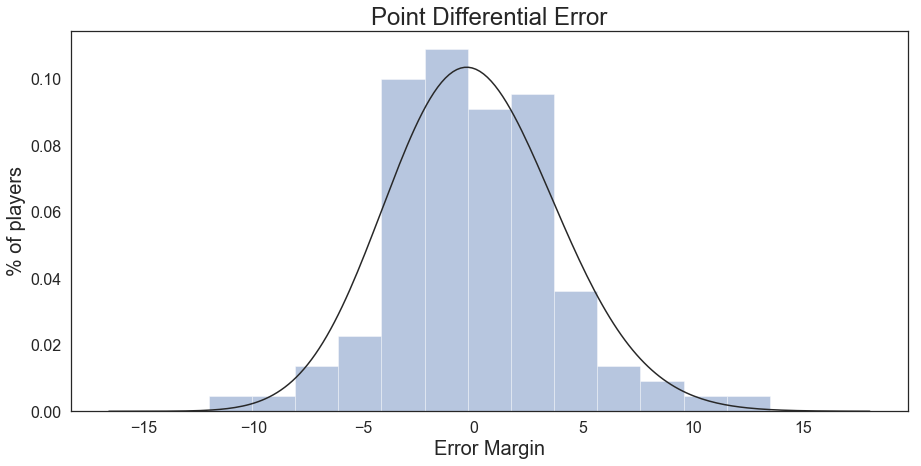

This model is able to relatively accurately predict 40.18% of NBA Rookies within 2 points.


In [89]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [90]:
webdata['pred6'] = test_y2['prediction'].values
webdata['hue6'] = test_y2['Pred'].values
webdata['chip6'] = test_y2['chip'].values

## TPOT

In [93]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=10, max_time_mins=1, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.NBAPTS.values.ravel())


1.0011469833333333 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: DecisionTreeRegressor(LinearSVR(StandardScaler(ZeroCount(SelectFwe(input_matrix, alpha=0.013000000000000001))), C=5.0, dual=True, epsilon=0.01, loss=epsilon_insensitive, tol=0.001), max_depth=3, min_samples_leaf=18, min_samples_split=15)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=1, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

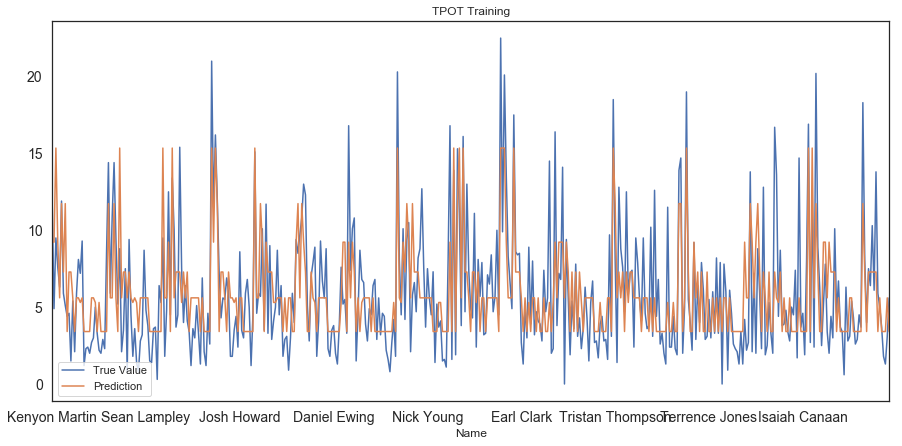

adj train r^2 = 0.4769316350753793
train mse = 8.09398317601616


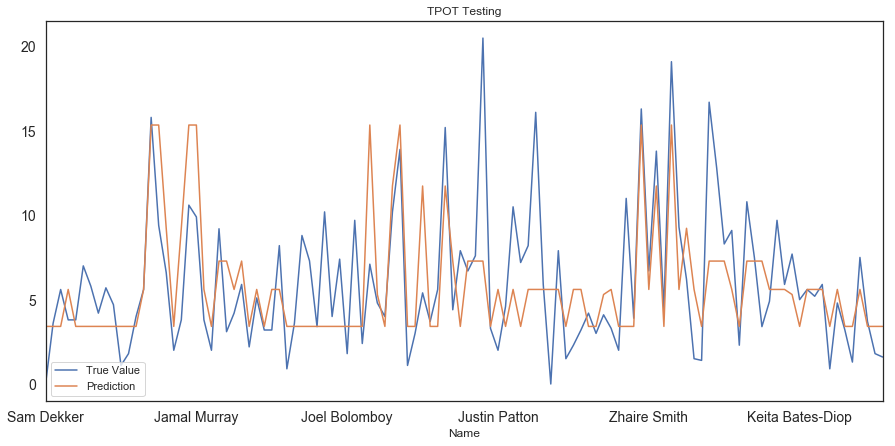

adj test r^2 = 0.28614696003010076
test mse = 11.493187467322823


In [94]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

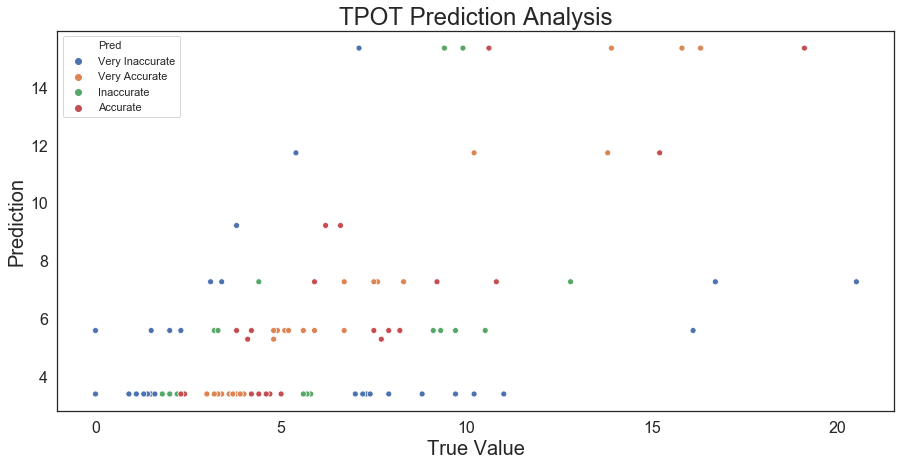

This model is able to relatively accurately predict 22.32% of NBA Rookies.
This model is able to very accurately predict 31.25% of NBA Rookies.


In [95]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("TPOT Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

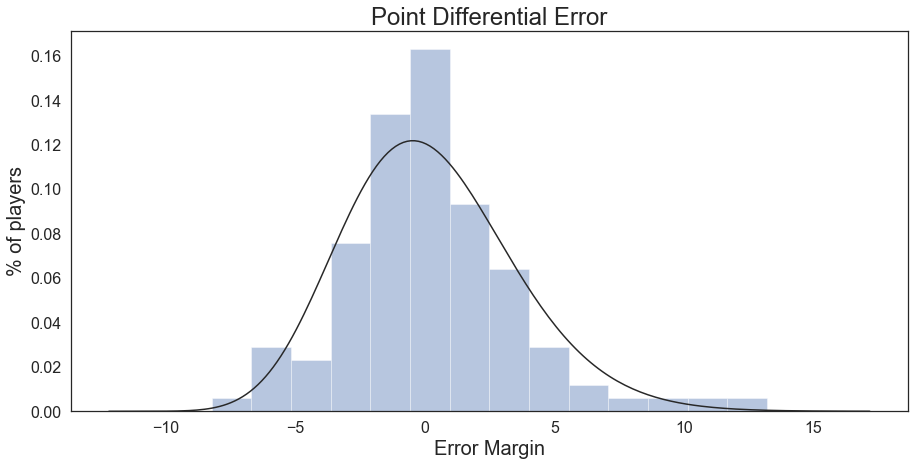

This model is able to relatively accurately predict 51.79% of NBA Rookies within 2 points.


In [96]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [97]:
cvs = cross_val_score(tpot, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))


1.0094578833333334 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: RidgeCV(LinearSVR(LinearSVR(VarianceThreshold(input_matrix, threshold=0.0001), C=10.0, dual=True, epsilon=0.0001, loss=epsilon_insensitive, tol=1e-05), C=25.0, dual=True, epsilon=0.001, loss=epsilon_insensitive, tol=1e-05))

1.0001881833333333 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: ElasticNetCV(PCA(DecisionTreeRegressor(input_matrix, max_depth=2, min_samples_leaf=16, min_samples_split=18), iterated_power=3, svd_solver=randomized), l1_ratio=0.05, tol=0.01)

1.0095427333333333 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: ElasticNetCV(MaxAbsScaler(

In [98]:
webdata['pred7'] = test_y2['prediction'].values
webdata['hue7'] = test_y2['Pred'].values
webdata['chip7'] = test_y2['chip'].values

## Differences

In [99]:
test_y2['chip'] = abs(test_y2['NBAPTS'] - test_y2['prediction'])
test_y2.sort_values('chip', ascending=True).head()

NBATRB    NBAAST    NBASTL    NBABLK  NBAPTS  prediction  \
Name                                                                           
Richaun Holmes    0.105357 -0.447877 -0.219566  1.659061     5.6    5.603906   
Grayson Allen    -0.949949 -0.375700 -0.733857 -0.209684     5.6    5.603906   
Dejounte Murray  -0.686122  0.057362 -0.733857 -0.209684     3.4    3.413174   
Monte Morris     -0.897184  0.779132  1.323307 -0.832599     3.3    3.413174   
Montrezl Harrell -0.369530 -0.592231 -0.476712  0.101773     3.6    3.413174   

                           Pred      chip  
Name                                       
Richaun Holmes    Very Accurate  0.003906  
Grayson Allen     Very Accurate  0.003906  
Dejounte Murray   Very Accurate  0.013174  
Monte Morris      Very Accurate  0.113174  
Montrezl Harrell  Very Accurate  0.186826

In [100]:
test_y2['chip'] = abs(test_y2['NBAPTS'] - test_y2['prediction'])
test_y2.sort_values('chip', ascending=False).head()

NBATRB    NBAAST    NBASTL    NBABLK  NBAPTS  prediction  \
Name                                                                           
Donovan Mitchell  0.685776  1.789611  2.609035  0.101773    20.5    7.285000   
Kyle Kuzma        2.057674  0.418247  0.294725  0.413231    16.1    5.603906   
Collin Sexton     0.263653  1.284372  0.037580 -0.521142    16.7    7.285000   
Markelle Fultz    0.369184  1.861788  1.066162  0.101773     7.1   15.347368   
Dillon Brooks     0.369184  0.273893  1.066162 -0.209684    11.0    3.413174   

                             Pred       chip  
Name                                          
Donovan Mitchell  Very Inaccurate  13.215000  
Kyle Kuzma        Very Inaccurate  10.496094  
Collin Sexton     Very Inaccurate   9.415000  
Markelle Fultz    Very Inaccurate   8.247368  
Dillon Brooks     Very Inaccurate   7.586826

In [101]:
webdata2 = webdata.round(2)
webdata2 = webdata2.replace('Very Inaccurate', 'rgb(171, 79, 82)')
webdata2 = webdata2.replace('Inaccurate', 'rgb(193, 127, 83)')
webdata2 = webdata2.replace('Accurate', 'rgb(113, 162, 104)')
webdata2 = webdata2.replace('Very Accurate', 'rgb(87, 110, 167)')
webdata2['level_0'] = webdata2.index
webdata2['Name'] = test_y2.index
webdata2.to_csv('RookieModelsData.csv')

## 2019 Predictions

In [165]:
train=df3
test=df4
trains = np.split(train, [37], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [37], axis=1)
test_x=tests[0]
test_y=tests[1]

In [166]:
test_y.head()

NBATRB    NBAAST    NBASTL    NBABLK    NBAPTS
Name                                                                      
Zion Williamson          -1.266541 -0.880939 -1.248148 -0.832599 -1.280125
Jaxson Hayes             -1.266541 -0.880939 -1.248148 -0.832599 -1.280125
Nickeil Alexander-Walker -1.266541 -0.880939 -1.248148 -0.832599 -1.280125
RJ Barrett               -1.266541 -0.880939 -1.248148 -0.832599 -1.280125
Ignas Brazdeikis         -1.266541 -0.880939 -1.248148 -0.832599 -1.280125

In [167]:
from sklearn.feature_selection import RFE
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    model = LinearRegression()
    rfe = RFE(model, 30)
    reg = rfe.fit(train_x.values, train_y[col].values)
    cols = []
    co = df3.columns
    for colo in co:
        cols = cols + [colo]
    picks = []
    for x in range(0,37):
        if reg.support_[x]:
            picks.append(cols[x])
    train_x3 = train_x[picks]
    test_x3 = test_x[picks]
    K.clear_session()
    model = RandomForestRegressor(n_estimators=1000, max_depth=5, min_samples_split=14).fit(train_x3.values, train_y[col].values.ravel())
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3.values))

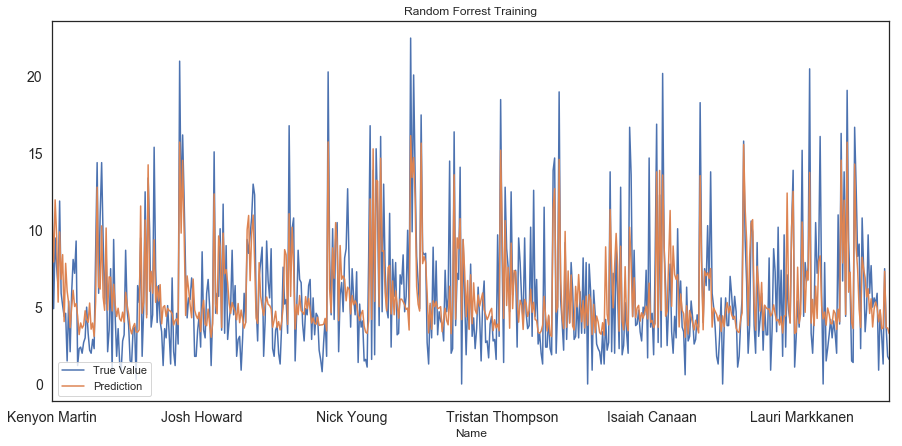

adj train r^2 = 0.6192112613866521
train mse = 5.947140759352246


In [192]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x3.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

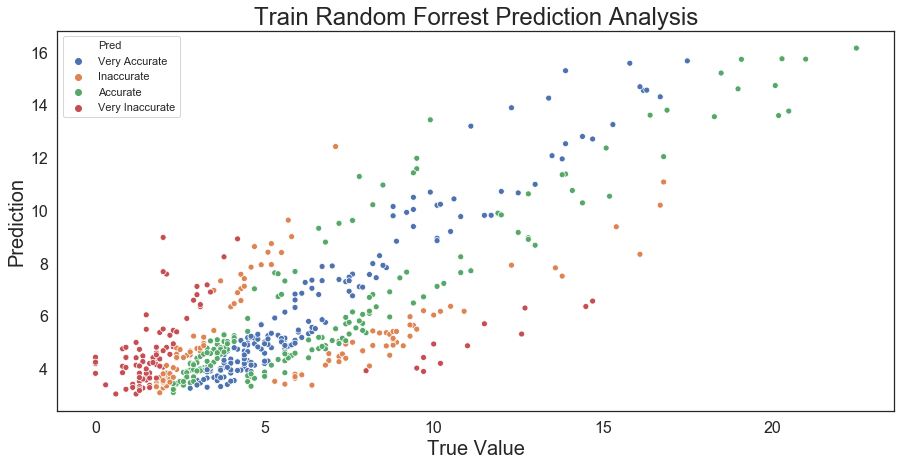

This model should be able to relatively accurately predict 31.13% of NBA Rookies.
This model should be able to very accurately predict 31.66% of NBA Rookies.


In [193]:
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=train_y2)
ax.set_title("Train Random Forrest Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model should be able to relatively accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")
print ("This model should be able to very accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Very Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")

## Results

In [170]:
test_y2 = test_y2.loc[~test_y2.index.duplicated(keep='first')]
test_y2['NBABLK'] = test_y2['NBABLK'].abs()

In [171]:
test_y2['Value'] = 1*test_y2['NBAPTS'] + 1.2*test_y2['NBATRB'] + 1.5*test_y2['NBAAST'] + 3*test_y2['NBASTL'] + 3*test_y2['NBABLK']
test_y2.sort_values('Value', ascending=False)

NBATRB    NBAAST    NBASTL    NBABLK     NBAPTS  \
Name                                                                          
Zion Williamson           7.101649  1.879864  1.152536  0.778404  14.143152   
Ja Morant                 3.784559  5.514093  0.875925  0.263837  14.248758   
RJ Barrett                4.872841  3.663619  0.662237  0.290240  14.723204   
Coby White                3.392889  4.548160  0.679065  0.205297  11.530698   
Darius Garland            3.917448  3.759171  0.622254  0.298424  11.576389   
Jaxson Hayes              4.299736  0.945870  0.621784  1.026251  10.450887   
Jarrett Culver            3.522265  2.017656  0.742516  0.236015  11.202621   
Cam Reddish               2.742642  1.201403  1.027148  0.253387  11.041889   
DeAndre Hunter            3.720012  1.592703  0.595468  0.288289   9.386625   
Rui Hachimura             4.274952  0.867397  0.506819  0.290037  10.041499   
PJ Washington             3.941962  0.905230  0.449067  0.399035  10.141232   
Cameron Johnson           3.763281  0.955269  0.437104  0.299899  10.016596   
Brandon Clarke            4.507416  0.829774  0.508416  0.951623   6.270813   
Daniel Gafford            4.550431  0.698612  0.426526  0.823947   6.222968   
Cody Martin               2.248064  2.720944  0.791487  0.347502   4.494588   
Dylan Windler             3.093691  1.109747  0.491867  0.348980   6.381302   
Bol Bol                   3.480546  0.528627  0.339963  0.793037   5.870521   
Tyler Herro               2.077024  1.683220  0.481414  0.157380   6.643533   
Grant Williams            3.116362  0.722295  0.431293  0.532710   5.731876   
Nickeil Alexander-Walker  1.863089  1.308493  0.662632  0.150835   6.453494   
Bruno Fernando            3.391964  0.688161  0.407331  0.530942   4.822127   
Jaylen Nowell             1.855086  2.469851  0.414149  0.134296   4.720145   
Chuma Okeke               2.520761  0.708139  0.472782  0.381535   5.427538   
Romeo Langford            1.993070  0.893391  0.423917  0.320394   5.877174   
Matisse Thybulle          1.432680  0.762755  0.953878  0.366484   5.004642   
Ty Jerome                 1.388976  2.388734  0.467486  0.091647   4.546618   
Ignas Brazdeikis          2.058504  0.729119  0.401098  0.164483   6.208883   
Mfiondu Kabengele         2.582574  0.605317  0.373034  0.435786   4.484359   
Tremont Waters            1.254040  1.956350  0.665361  0.086190   4.213755   
Marial Shayok             1.745250  1.001435  0.383246  0.129390   5.385804   
Quinndary Weatherspoon    1.846008  0.901449  0.697688  0.145826   4.265858   
Jalen McDaniels           2.811770  0.719773  0.338497  0.178391   4.354918   
Jaylen Hands              1.663834  2.097332  0.400738  0.107549   3.664845   
Carsen Edwards            1.398085  1.373671  0.394369  0.106588   5.024746   
Justin Wright-Foreman     1.564527  1.592244  0.303696  0.111392   4.582492   
Terance Mann              2.492047  0.901342  0.421760  0.159551   3.950161   
Kevin PorterJr            2.072481  0.773779  0.354160  0.178306   4.757769   
Nicolas Claxton           2.106985  0.563856  0.369124  0.602840   3.679176   
Jordan Bone               1.260035  2.144799  0.425307  0.083975   3.575608   
Jordan Poole              1.559090  1.637250  0.396482  0.115448   3.956287   
Isaiah Roby               2.196575  0.694742  0.395374  0.401292   3.593094   
Nassir Little             2.196365  0.573444  0.390990  0.154465   4.441209   
Kyle Guy                  1.288114  1.432712  0.377106  0.090854   4.167477   
Keldon Johnson            1.861205  0.631983  0.380742  0.122846   4.572859   
Miye Oni                  1.687757  0.917954  0.326696  0.238224   4.003372   
Eric Paschall             1.974793  0.654321  0.406436  0.169250   4.016096   
Jarrell Brantley          2.101213  0.589829  0.323493  0.187780   4.119151   
Talen Horton-Tucker       1.690672  0.941625  0.419070  0.178844   3.795732   
Admiral Schofield         1.721559  0.564044  0.359359  0.142240   3.653938   

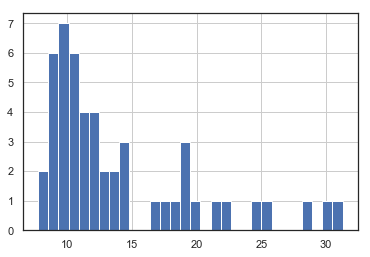

Value Distribution in Draft


In [172]:
hist = test_y2['Value'].hist(bins=30)
plt.show()
print('Value Distribution in Draft')
## This is the result of Neural Networks

In [173]:
test_y2['NBAPTS'].mean()

6.379619670342899

In [174]:
test_y2 = test_y2.round(2)
test_y2 = test_y2.sort_index(axis = 0) 
test_y2.head()

NBATRB  NBAAST  NBASTL  NBABLK  NBAPTS  Value
Name                                                            
Admiral Schofield    1.72    0.56    0.36    0.14    3.65   8.07
Bol Bol              3.48    0.53    0.34    0.79    5.87  14.24
Brandon Clarke       4.51    0.83    0.51    0.95    6.27  17.30
Bruno Fernando       3.39    0.69    0.41    0.53    4.82  12.74
Cam Reddish          2.74    1.20    1.03    0.25   11.04  19.98

In [175]:
dfn = pd.read_csv('CollegeRookieStatLog5.csv')
dfnm = pd.read_csv('NewRookiePredictions4-1.csv')
dfn = dfn[['Name','Pos']]
finaly = test_y2.merge(dfn, left_on='Name', right_on='Name')
finaly['Glitch'] = dfnm['Glitch'].values
finaly.head()

Name  NBATRB  NBAAST  NBASTL  NBABLK  NBAPTS  Value Pos  \
0  Admiral Schofield    1.72    0.56    0.36    0.14    3.65   8.07  SF   
1            Bol Bol    3.48    0.53    0.34    0.79    5.87  14.24   C   
2     Brandon Clarke    4.51    0.83    0.51    0.95    6.27  17.30  PF   
3     Bruno Fernando    3.39    0.69    0.41    0.53    4.82  12.74   C   
4        Cam Reddish    2.74    1.20    1.03    0.25   11.04  19.98  SG   

                                              Glitch  
0  https://cdn.glitch.com/bee12572-658d-4980-958c...  
1  https://cdn.glitch.com/bee12572-658d-4980-958c...  
2  https://cdn.glitch.com/bee12572-658d-4980-958c...  
3  https://cdn.glitch.com/bee12572-658d-4980-958c...  
4  https://cdn.glitch.com/bee12572-658d-4980-958c...

In [176]:
finaly.to_csv('NewRookiePredictions4-1.csv')

## Draft Night vs Results

In [177]:
college2 = pd.read_csv('2019DraftResults.csv')
dfo = pd.read_csv('NewRookiePredictions4-1.csv')

In [178]:
college2 = college2.drop(['Unnamed: 0'], axis=1)
dfo = dfo.drop(['Unnamed: 0','Glitch'], axis=1)
dfo = dfo.sort_values('Value', ascending=False)
dfo = dfo.reset_index()
dfo = dfo.drop(['index'], axis=1)
college2 = college2.rename(index=str, columns={"emp": "Name"})

In [179]:
from IPython.display import display_html 
df1_styler = college2[college2['pos']=='PG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Point Guards:')
df2_styler = dfo[dfo['Pos']=='PG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Point Guards:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

Draft Results Point Guards: Name height weight pos col age 
 
 1 
 Ja Morant 
 6-3 
 175 
 PG 
 Murray St. 
 19 
 
 
 4 
 Darius Garland 
 6-2 
 175 
 PG 
 Vanderbilt 
 19 
 
 
 6 
 Coby White 
 6-5 
 190 
 PG 
 North Carolina 
 19 
 
 
 23 
 Ty Jerome 
 6-5 
 195 
 PG 
 Virginia 
 21 
 
 
 27 
 Jordan Poole 
 6-5 
 190 
 PG 
 Michigan 
 20 
 
 
 32 
 Carsen Edwards 
 6-0 
 200 
 PG 
 Purdue 
 21 
 
 
 42 
 Jaylen Nowell 
 6-4 
 200 
 PG 
 Washington 
 19 
 
 
 50 
 Tremont Waters 
 5-11 
 175 
 PG 
 LSU 
 21 
 
 
 52 
 Justin Wright-Foreman 
 6-2 
 190 
 PG 
 Hofstra 
 21 
 
 
 54 
 Kyle Guy 
 6-2 
 170 
 PG 
 Virginia 
 21 
 
 
 55 
 Jaylen Hands 
 6-3 
 180 
 PG 
 UCLA 
 20 
 
 
 56 
 Jordan Bone 
 6-3 
 180 
 PG 
 Tennessee 
 21 
 
 Power Ranking Point Guards: Name NBATRB NBAAST NBASTL NBABLK NBAPTS Value Pos 
 
 1 
 Ja Morant 
 3.78 
 5.51 
 0.88 
 0.26 
 14.25 
 30.48 
 PG 
 
 
 3 
 Coby White 
 3.39 
 4.55 
 0.68 
 0.21 
 11.53 
 25.08 
 PG 
 
 
 4 
 Darius Garland 
 3.92 
 3.76 
 0.62 
 0.3 
 11.58 
 24.68 
 PG 
 
 
 21 
 Jaylen Nowell 
 1.86 
 2.47 
 0.41 
 0.13 
 4.72 
 12.3 
 PG 
 
 
 25 
 Ty Jerome 
 1.39 
 2.39 
 0.47 
 0.09 
 4.55 
 11.47 
 PG 
 
 
 28 
 Tremont Waters 
 1.25 
 1.96 
 0.67 
 0.09 
 4.21 
 10.91 
 PG 
 
 
 32 
 Jaylen Hands 
 1.66 
 2.1 
 0.4 
 0.11 
 3.66 
 10.33 
 PG 
 
 
 33 
 Carsen Edwards 
 1.4 
 1.37 
 0.39 
 0.11 
 5.02 
 10.27 
 PG 
 
 
 34 
 Justin Wright-Foreman 
 1.56 
 1.59 
 0.3 
 0.11 
 4.58 
 10.09 
 PG 
 
 
 38 
 Jordan Bone 
 1.26 
 2.14 
 0.43 
 0.08 
 3.58 
 9.83 
 PG 
 
 
 39 
 Jordan Poole 
 1.56 
 1.64 
 0.4 
 0.12 
 3.96 
 9.82 
 PG 
 
 
 42 
 Kyle Guy 
 1.29 
 1.43 
 0.38 
 0.09 
 4.17 
 9.27 
 PG

In [180]:
df1_styler = college2[college2['pos']=='SG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Shooting Guards:')
df2_styler = dfo[dfo['Pos']=='SG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Shooting Guards:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

Draft Results Shooting Guards: Name height weight pos col age 
 
 2 
 RJ Barrett 
 6-7 
 210 
 SG 
 Duke 
 19 
 
 
 5 
 Jarrett Culver 
 6-6 
 195 
 SG 
 Texas Tech 
 20 
 
 
 9 
 Cameron Reddish 
 6-8 
 210 
 SG 
 Duke 
 19 
 
 
 12 
 Tyler Herro 
 6-6 
 195 
 SG 
 Kentucky 
 19 
 
 
 13 
 Romeo Langford 
 6-6 
 210 
 SG 
 Indiana 
 19 
 
 
 16 
 Nickeil Alexander-Walker 
 6-5 
 205 
 SG 
 Virginia Tech 
 20 
 
 
 19 
 Matisse Thybulle 
 6-6 
 200 
 SG 
 Washington 
 22 
 
 
 25 
 Dylan Windler 
 6-7 
 195 
 SG 
 Belmont 
 22 
 
 
 28 
 Keldon Johnson 
 6-6 
 215 
 SG 
 Kentucky 
 19 
 
 
 29 
 Kevin Porter 
 6-5 
 215 
 SG 
 USC 
 19 
 
 
 31 
 KZ Okpala 
 6-8 
 210 
 SG 
 Stanford 
 20 
 
 
 34 
 Marcos Louzada Silva 
 6-5 
 190 
 SG 
 Brazil 
 19 
 
 
 35 
 Cody Martin 
 6-6 
 190 
 SG 
 Nevada 
 23 
 
 
 39 
 Justin James 
 6-7 
 180 
 SG 
 Wyoming 
 22 
 
 
 45 
 Talen Horton-Tucker 
 6-4 
 235 
 SG 
 Iowa St. 
 18 
 
 
 47 
 Terance Mann 
 6-6 
 205 
 SG 
 Florida St. 
 22 
 
 
 48 
 Quinndary Weatherspoon 
 6-4 
 205 
 SG 
 Mississippi St. 
 22 
 
 
 53 
 Marial Shayok 
 6-6 
 195 
 SG 
 Iowa St. 
 23 
 
 
 57 
 Miye Oni 
 6-5 
 205 
 SG 
 Yale 
 21 
 
 
 59 
 Vanja Marinkovic 
 6-7 
 195 
 SG 
 Serbia 
 22 
 
 Power Ranking Shooting Guards: Name NBATRB NBAAST NBASTL NBABLK NBAPTS Value Pos 
 
 2 
 RJ Barrett 
 4.87 
 3.66 
 0.66 
 0.29 
 14.72 
 28.92 
 SG 
 
 
 6 
 Jarrett Culver 
 3.52 
 2.02 
 0.74 
 0.24 
 11.2 
 21.39 
 SG 
 
 
 7 
 Cam Reddish 
 2.74 
 1.2 
 1.03 
 0.25 
 11.04 
 19.98 
 SG 
 
 
 14 
 Cody Martin 
 2.25 
 2.72 
 0.79 
 0.35 
 4.49 
 14.69 
 SG 
 
 
 15 
 Dylan Windler 
 3.09 
 1.11 
 0.49 
 0.35 
 6.38 
 14.28 
 SG 
 
 
 17 
 Tyler Herro 
 2.08 
 1.68 
 0.48 
 0.16 
 6.64 
 13.58 
 SG 
 
 
 19 
 Nickeil Alexander-Walker 
 1.86 
 1.31 
 0.66 
 0.15 
 6.45 
 13.09 
 SG 
 
 
 23 
 Romeo Langford 
 1.99 
 0.89 
 0.42 
 0.32 
 5.88 
 11.84 
 SG 
 
 
 24 
 Matisse Thybulle 
 1.43 
 0.76 
 0.95 
 0.37 
 5 
 11.83 
 SG 
 
 
 29 
 Marial Shayok 
 1.75 
 1 
 0.38 
 0.13 
 5.39 
 10.52 
 SG 
 
 
 30 
 Quinndary Weatherspoon 
 1.85 
 0.9 
 0.7 
 0.15 
 4.27 
 10.36 
 SG 
 
 
 35 
 Terance Mann 
 2.49 
 0.9 
 0.42 
 0.16 
 3.95 
 10.04 
 SG 
 
 
 36 
 Kevin PorterJr 
 2.07 
 0.77 
 0.35 
 0.18 
 4.76 
 10 
 SG 
 
 
 43 
 Keldon Johnson 
 1.86 
 0.63 
 0.38 
 0.12 
 4.57 
 9.27 
 SG 
 
 
 44 
 Miye Oni 
 1.69 
 0.92 
 0.33 
 0.24 
 4 
 9.1 
 SG 
 
 
 47 
 Talen Horton-Tucker 
 1.69 
 0.94 
 0.42 
 0.18 
 3.8 
 9.03 
 SG 
 
 
 49 
 Justin James 
 1.57 
 0.6 
 0.32 
 0.15 
 3.54 
 7.74 
 SG

In [181]:
df1_styler = college2[college2['pos']=='SF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Small Forwards:')
df2_styler = dfo[dfo['Pos']=='SF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Small Forwards:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

Draft Results Small Forwards: Name height weight pos col age 
 
 3 
 DeAndre Hunter 
 6-7 
 225 
 SF 
 Virginia 
 21 
 
 
 8 
 Rui Hachimura 
 6-8 
 235 
 SF 
 Gonzaga 
 21 
 
 
 10 
 Cameron Johnson 
 6-8 
 205 
 SF 
 North Carolina 
 23 
 
 
 14 
 Sekou Doumbouya 
 6-9 
 230 
 SF 
 France 
 18 
 
 
 15 
 Chuma Okeke 
 6-8 
 235 
 SF 
 Auburn 
 20 
 
 
 22 
 Darius Bazley 
 6-9 
 210 
 SF 
 USA 
 19 
 
 
 24 
 Nassir Little 
 6-6 
 225 
 SF 
 North Carolina 
 19 
 
 
 36 
 Deividas Sirvydis 
 6-8 
 195 
 SF 
 Lithuania 
 19 
 
 
 41 
 Admiral Schofield 
 6-5 
 240 
 SF 
 Tennessee 
 22 
 
 
 44 
 Isaiah Roby 
 6-8 
 215 
 SF 
 Nebraska 
 21 
 
 
 46 
 Ignas Brazdeikis 
 6-7 
 220 
 SF 
 Michigan 
 20 
 
 
 51 
 Jalen McDaniels 
 6-9 
 190 
 SF 
 San Diego St. 
 21 
 
 Power Ranking Small Forwards: Name NBATRB NBAAST NBASTL NBABLK NBAPTS Value Pos 
 
 8 
 DeAndre Hunter 
 3.72 
 1.59 
 0.6 
 0.29 
 9.39 
 18.89 
 SF 
 
 
 9 
 Rui Hachimura 
 4.27 
 0.87 
 0.51 
 0.29 
 10.04 
 18.86 
 SF 
 
 
 11 
 Cameron Johnson 
 3.76 
 0.96 
 0.44 
 0.3 
 10.02 
 18.18 
 SF 
 
 
 22 
 Chuma Okeke 
 2.52 
 0.71 
 0.47 
 0.38 
 5.43 
 12.08 
 SF 
 
 
 26 
 Ignas Brazdeikis 
 2.06 
 0.73 
 0.4 
 0.16 
 6.21 
 11.47 
 SF 
 
 
 31 
 Jalen McDaniels 
 2.81 
 0.72 
 0.34 
 0.18 
 4.35 
 10.36 
 SF 
 
 
 40 
 Isaiah Roby 
 2.2 
 0.69 
 0.4 
 0.4 
 3.59 
 9.66 
 SF 
 
 
 41 
 Nassir Little 
 2.2 
 0.57 
 0.39 
 0.15 
 4.44 
 9.57 
 SF 
 
 
 48 
 Admiral Schofield 
 1.72 
 0.56 
 0.36 
 0.14 
 3.65 
 8.07 
 SF

In [182]:
df1_styler = college2[college2['pos']=='PF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Power Forwards:')
df2_styler = dfo[dfo['Pos']=='PF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Power Forwards:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

Draft Results Power Forwards: Name height weight pos col age 
 
 0 
 Zion Williamson 
 6-6 
 280 
 PF 
 Duke 
 18 
 
 
 7 
 Jaxson Hayes 
 6-11 
 220 
 PF 
 Texas 
 19 
 
 
 11 
 PJ Washington 
 6-8 
 230 
 PF 
 Kentucky 
 20 
 
 
 18 
 Luka Samanic 
 6-11 
 230 
 PF 
 Croatia 
 19 
 
 
 20 
 Brandon Clarke 
 6-8 
 210 
 PF 
 Gonzaga 
 22 
 
 
 21 
 Grant Williams 
 6-7 
 240 
 PF 
 Tennessee 
 20 
 
 
 26 
 Mfiondu Kabengele 
 6-10 
 255 
 PF 
 Florida St. 
 21 
 
 
 30 
 Nicolas Claxton 
 6-11 
 215 
 PF 
 Georgia 
 20 
 
 
 37 
 Daniel Gafford 
 6-10 
 240 
 PF 
 Arkansas 
 20 
 
 
 38 
 Alen Smailagic 
 6-10 
 215 
 PF 
 Serbia 
 18 
 
 
 40 
 Eric Paschall 
 6-7 
 255 
 PF 
 Villanova 
 22 
 
 
 49 
 Jarrell Brantley 
 6-7 
 255 
 PF 
 Charleston 
 23 
 
 Power Ranking Power Forwards: Name NBATRB NBAAST NBASTL NBABLK NBAPTS Value Pos 
 
 0 
 Zion Williamson 
 7.1 
 1.88 
 1.15 
 0.78 
 14.14 
 31.28 
 PF 
 
 
 5 
 Jaxson Hayes 
 4.3 
 0.95 
 0.62 
 1.03 
 10.45 
 21.97 
 PF 
 
 
 10 
 PJ Washington 
 3.94 
 0.91 
 0.45 
 0.4 
 10.14 
 18.77 
 PF 
 
 
 12 
 Brandon Clarke 
 4.51 
 0.83 
 0.51 
 0.95 
 6.27 
 17.3 
 PF 
 
 
 13 
 Daniel Gafford 
 4.55 
 0.7 
 0.43 
 0.82 
 6.22 
 16.48 
 PF 
 
 
 18 
 Grant Williams 
 3.12 
 0.72 
 0.43 
 0.53 
 5.73 
 13.45 
 PF 
 
 
 27 
 Mfiondu Kabengele 
 2.58 
 0.61 
 0.37 
 0.44 
 4.48 
 10.92 
 PF 
 
 
 37 
 Nicolas Claxton 
 2.11 
 0.56 
 0.37 
 0.6 
 3.68 
 9.97 
 PF 
 
 
 45 
 Eric Paschall 
 1.97 
 0.65 
 0.41 
 0.17 
 4.02 
 9.09 
 PF 
 
 
 46 
 Jarrell Brantley 
 2.1 
 0.59 
 0.32 
 0.19 
 4.12 
 9.06 
 PF

In [183]:
df1_styler = college2[college2['pos']=='C'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Centers:')
df2_styler = dfo[dfo['Pos']=='C'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Centers:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

Draft Results Centers: Name height weight pos col age 
 
 17 
 Goga Bitadze 
 6-11 
 250 
 C 
 Rep. of Georgia 
 19 
 
 
 33 
 Bruno Fernando 
 6-10 
 240 
 C 
 Maryland 
 20 
 
 
 43 
 Bol Bol 
 7-2 
 210 
 C 
 Oregon 
 19 
 
 
 58 
 Dewan Hernandez 
 6-10 
 235 
 C 
 Miami 
 22 
 
 Power Ranking Centers: Name NBATRB NBAAST NBASTL NBABLK NBAPTS Value Pos 
 
 16 
 Bol Bol 
 3.48 
 0.53 
 0.34 
 0.79 
 5.87 
 14.24 
 C 
 
 
 20 
 Bruno Fernando 
 3.39 
 0.69 
 0.41 
 0.53 
 4.82 
 12.74 
 C

## Added Value

In [184]:
dfm = pd.read_csv('fixlater2.csv')
dfm = dfm[['Name','Pk','Tm']]
finaly = dfo.merge(dfm, left_on='Name', right_on='Name')
finaly.Tm = finaly.Tm.str[:-4]
finaly = finaly.sort_values('Pk', ascending=True)
finaly.head()

Name  NBATRB  NBAAST  NBASTL  NBABLK  NBAPTS  Value Pos  Pk  \
0  Zion Williamson    7.10    1.88    1.15    0.78   14.14  31.28  PF   1   
1        Ja Morant    3.78    5.51    0.88    0.26   14.25  30.48  PG   2   
2       RJ Barrett    4.87    3.66    0.66    0.29   14.72  28.92  SG   3   
8   DeAndre Hunter    3.72    1.59    0.60    0.29    9.39  18.89  SF   4   
4   Darius Garland    3.92    3.76    0.62    0.30   11.58  24.68  PG   5   

          Tm  
0   Pelicans  
1  Grizzlies  
2     Knicks  
8      Hawks  
4  Cavaliers

In [185]:
finaly['diff'] = finaly.sort_values('Pk', ascending=True)['Value'].values - finaly.sort_values('Value', ascending=False)['Value'].values

In [186]:
teams = finaly.Tm.unique()
av = []
for t in teams:
    av.append(t)
    finaly2 = finaly[finaly['Tm']==t]
    av.append(finaly2['NBAPTS'].sum())
    av.append(finaly2['NBAAST'].sum())
    av.append(finaly2['NBATRB'].sum())
    av.append(finaly2['NBASTL'].sum())
    av.append(finaly2['NBABLK'].sum())
    av.append(finaly2['Value'].sum())
    av.append(finaly2['diff'].sum())
    av.append(len(finaly2))
av2 = np.array(av)
refined = np.reshape(av2, (-1, 9))
teamdf = pd.DataFrame(refined, columns=['Team','Points','Assists','Rebounds','Steals','Blocks','Value','Grade','Num'])
cols=['Points','Assists','Rebounds','Steals','Blocks','Value','Grade','Num']
for col in cols:
    teamdf[col] = pd.to_numeric(teamdf[col], errors='coerce')

In [187]:
teamdf = teamdf.set_index('Team')
df1_styler = teamdf[['Points']].sort_values('Points', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Scoring:')
df2_styler = teamdf[['Assists']].sort_values('Assists', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Passing:')
df3_styler = teamdf[['Rebounds']].sort_values('Rebounds', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Rebounding:')
df4_styler = teamdf[['Steals']].sort_values('Steals', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Stealing:')
df5_styler = teamdf[['Blocks']].sort_values('Blocks', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Blocking:')
display_html(df1_styler._repr_html_()+' '+df2_styler._repr_html_()+' '+df3_styler._repr_html_()+' '+df4_styler._repr_html_()+' '+df5_styler._repr_html_(), raw=True)

Added Scoring: Points Team 
 
 Pelicans 
 31.04 
 
 
 Hawks 
 25.25 
 
 
 Cavaliers 
 22.72 
 
 
 Knicks 
 20.93 
 
 
 Celtics 
 20.84 
 
 
 Grizzlies 
 20.52 
 
 
 Hornets 
 18.98 
 
 
 76ers 
 18.59 
 
 
 Bulls 
 17.75 
 
 
 Timberwolves 
 15.92 
 
 
 Jazz 
 12.7 
 
 
 Clippers 
 12.09 
 
 
 Wizards 
 10.04 
 
 
 Suns 
 10.02 
 
 
 Spurs 
 8.84 
 
 
 Warriors 
 7.98 
 
 
 Kings 
 7.71 
 
 
 Heat 
 6.64 
 
 
 Nuggets 
 5.87 
 
 
 Magic 
 5.43 
 
 
 Trailblazers 
 4.44 
 
 
 Lakers 
 3.8 
 
 
 Nets 
 3.68 
 
 
 Mavericks 
 3.59 
 
 
 Pistons 
 3.58 
 
 Added Passing: Assists Team 
 
 Grizzlies 
 6.34 
 
 
 Cavaliers 
 5.64 
 
 
 Bulls 
 5.25 
 
 
 Celtics 
 4.94 
 
 
 76ers 
 4.71 
 
 
 Timberwolves 
 4.49 
 
 
 Knicks 
 4.39 
 
 
 Hornets 
 4.35 
 
 
 Pelicans 
 4.14 
 
 
 Clippers 
 3.61 
 
 
 Hawks 
 3.48 
 
 
 Jazz 
 3.1 
 
 
 Warriors 
 2.29 
 
 
 Pistons 
 2.14 
 
 
 Kings 
 2.03 
 
 
 Heat 
 1.68 
 
 
 Spurs 
 1.53 
 
 
 Suns 
 0.96 
 
 
 Lakers 
 0.94 
 
 
 Wizards 
 0.87 
 
 
 Magic 
 0.71 
 
 
 Mavericks 
 0.69 
 
 
 Trailblazers 
 0.57 
 
 
 Nets 
 0.56 
 
 
 Nuggets 
 0.53 
 
 Added Rebounding: Rebounds Team 
 
 Pelicans 
 13.26 
 
 
 Hawks 
 9.85 
 
 
 Cavaliers 
 9.08 
 
 
 Hornets 
 9 
 
 
 Grizzlies 
 8.29 
 
 
 Bulls 
 7.94 
 
 
 Celtics 
 7.76 
 
 
 Knicks 
 6.93 
 
 
 Clippers 
 6.73 
 
 
 76ers 
 6.29 
 
 
 Timberwolves 
 5.38 
 
 
 Jazz 
 5.35 
 
 
 Wizards 
 4.27 
 
 
 Suns 
 3.76 
 
 
 Spurs 
 3.71 
 
 
 Warriors 
 3.53 
 
 
 Nuggets 
 3.48 
 
 
 Kings 
 2.86 
 
 
 Magic 
 2.52 
 
 
 Trailblazers 
 2.2 
 
 
 Mavericks 
 2.2 
 
 
 Nets 
 2.11 
 
 
 Heat 
 2.08 
 
 
 Lakers 
 1.69 
 
 
 Pistons 
 1.26 
 
 Added Stealing: Steals Team 
 
 Pelicans 
 2.43 
 
 
 76ers 
 2.16 
 
 
 Hawks 
 2.04 
 
 
 Celtics 
 1.91 
 
 
 Hornets 
 1.58 
 
 
 Cavaliers 
 1.46 
 
 
 Grizzlies 
 1.39 
 
 
 Clippers 
 1.19 
 
 
 Timberwolves 
 1.15 
 
 
 Bulls 
 1.11 
 
 
 Spurs 
 1.08 
 
 
 Knicks 
 1.06 
 
 
 Jazz 
 0.95 
 
 
 Warriors 
 0.81 
 
 
 Kings 
 0.7 
 
 
 Wizards 
 0.51 
 
 
 Heat 
 0.48 
 
 
 Magic 
 0.47 
 
 
 Suns 
 0.44 
 
 
 Pistons 
 0.43 
 
 
 Lakers 
 0.42 
 
 
 Mavericks 
 0.4 
 
 
 Trailblazers 
 0.39 
 
 
 Nets 
 0.37 
 
 
 Nuggets 
 0.34 
 
 Added Blocking: Blocks Team 
 
 Pelicans 
 1.96 
 
 
 Grizzlies 
 1.21 
 
 
 Hawks 
 1.07 
 
 
 Celtics 
 1.05 
 
 
 Bulls 
 1.03 
 
 
 Hornets 
 0.93 
 
 
 Cavaliers 
 0.83 
 
 
 Nuggets 
 0.79 
 
 
 76ers 
 0.73 
 
 
 Clippers 
 0.71 
 
 
 Nets 
 0.6 
 
 
 Jazz 
 0.54 
 
 
 Knicks 
 0.45 
 
 
 Mavericks 
 0.4 
 
 
 Magic 
 0.38 
 
 
 Timberwolves 
 0.37 
 
 
 Suns 
 0.3 
 
 
 Warriors 
 0.29 
 
 
 Wizards 
 0.29 
 
 
 Spurs 
 0.27 
 
 
 Kings 
 0.24 
 
 
 Lakers 
 0.18 
 
 
 Heat 
 0.16 
 
 
 Trailblazers 
 0.15 
 
 
 Pistons 
 0.08

In [188]:
df1_styler = teamdf[['Value']].sort_values('Value', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Value:')
df2_styler = teamdf[['Grade']].sort_values('Grade', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Grade:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

Added Value: Value Team 
 
 Pelicans 
 66.34 
 
 
 Hawks 
 51.61 
 
 
 Cavaliers 
 48.96 
 
 
 Grizzlies 
 47.78 
 
 
 Celtics 
 46.47 
 
 
 Hornets 
 43.82 
 
 
 76ers 
 41.89 
 
 
 Bulls 
 41.56 
 
 
 Knicks 
 40.39 
 
 
 Timberwolves 
 33.69 
 
 
 Clippers 
 31.29 
 
 
 Jazz 
 28.25 
 
 
 Spurs 
 19.63 
 
 
 Warriors 
 18.91 
 
 
 Wizards 
 18.86 
 
 
 Suns 
 18.18 
 
 
 Kings 
 17.01 
 
 
 Nuggets 
 14.24 
 
 
 Heat 
 13.58 
 
 
 Magic 
 12.08 
 
 
 Nets 
 9.97 
 
 
 Pistons 
 9.83 
 
 
 Mavericks 
 9.66 
 
 
 Trailblazers 
 9.57 
 
 
 Lakers 
 9.03 
 
 Draft Grade: Grade Team 
 
 Bulls 
 9.81 
 
 
 Hornets 
 5.85 
 
 
 Nuggets 
 4.2 
 
 
 Grizzlies 
 3.72 
 
 
 Jazz 
 1.84 
 
 
 Pistons 
 1.76 
 
 
 Knicks 
 1.64 
 
 
 Timberwolves 
 1.63 
 
 
 Pelicans 
 0.8 
 
 
 Cavaliers 
 0.51 
 
 
 Clippers 
 0.36 
 
 
 Wizards 
 -0.03 
 
 
 Mavericks 
 -0.34 
 
 
 Suns 
 -0.59 
 
 
 Lakers 
 -0.94 
 
 
 Nets 
 -1.5 
 
 
 Spurs 
 -1.86 
 
 
 Kings 
 -2.41 
 
 
 Magic 
 -2.61 
 
 
 Trailblazers 
 -3.17 
 
 
 Hawks 
 -3.24 
 
 
 Warriors 
 -3.26 
 
 
 Celtics 
 -3.65 
 
 
 Heat 
 -3.72 
 
 
 76ers 
 -4.8

In [189]:
import plotly.plotly as py
import plotly.graph_objs as go
teamdf['Exp'] = teamdf['Value'] - teamdf['Grade']

trace1 = go.Scatter(
    y = teamdf['Value'],
    x = teamdf['Exp'],
    text= teamdf.index,
    mode='markers',
    marker=dict(
        size=16,
        color = teamdf['Grade'], #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace1]
layout= go.Layout(
    title= 'Value Added by Teams in NBA Draft',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Expected Value'
    ),
    yaxis=dict(
        title= 'Actual Value'
    ),
    showlegend= False
)
fig= go.Figure(data, layout=layout)
py.iplot(fig)

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

